# 출산율과 교육비 사이의 관계

데이터분석및실습_01\
주종화 교수님\
2018112089 박세준

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.colors as mcolors
import matplotlib

# sns.set_theme(style="darkgrid")
matplotlib.rc_file_defaults()

## 사교육비

In [2]:

f = open('./01-사교육비/학교급별_사교육비_총액_20211026141643.csv')
data = csv.reader(f)

cost = pd.DataFrame(data)
cost = cost.rename(columns=cost.iloc[0])
cost = cost.drop(cost.index[0])
cost = cost.drop(cost.columns[[0]], axis=1)
cost = cost.iloc[[0,1]]

for i in range(2007,2020):
    cost[str(i)]
l = ["전체", "초등학교", "중학교", "고등학교", "일반고"]

#for i in cost["2007"].iloc[0]:
    #l.append(i)

df = pd.DataFrame(cost['2007'].iloc[[1]].values.astype(float), index=[2007], columns=l)
for i in range(2008, 2020):
    df = df.append(pd.DataFrame(cost[str(i)].iloc[[1]].values.astype(float).reshape(1,-1),index=[i], columns=list(df)))
df = df.drop(df.columns[[-1]], axis=1)
df
cost = df
cost

,전체,초등학교,중학교,고등학교
2007,200400.0,102098.0,56120.0,42181.0
2008,209095.0,104307.0,58135.0,46652.0
2009,216259.0,102309.0,62656.0,51294.0
2010,208718.0,97080.0,60396.0,51242.0
2011,201266.0,90461.0,60006.0,50799.0
2012,190395.0,77554.0,61162.0,51679.0
2013,185960.0,77375.0,57831.0,50754.0
2014,182297.0,75949.0,55678.0,50671.0
2015,178346.0,75287.0,52384.0,50675.0
2016,180606.0,77438.0,48102.0,55065.0


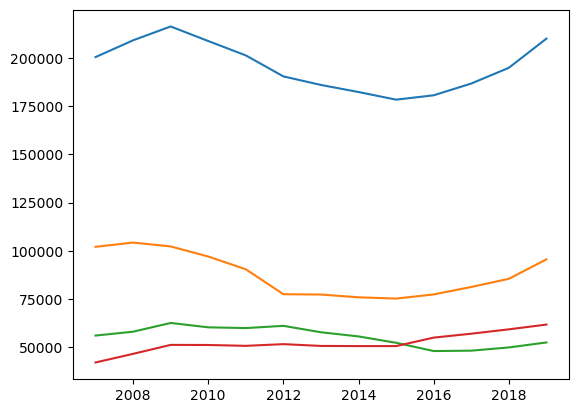

In [3]:
plt.plot(cost)
plt.show()

## 초등학교 입학

In [4]:
c = list(range(2007,2020))

f = open('./02-초등학교/334_DT_1963003_002_20211026142050.csv')
data = csv.reader(f)

ele = pd.DataFrame(data)
ele = ele.rename(columns=ele.iloc[0])

ele = ele.drop(ele.index[0])
ele.head(20)
ele = ele.iloc[8]
ele = ele.drop(ele.index[0:6])
ele = ele.drop(ele.index[-2:])
ele = pd.to_numeric(ele)
ele = pd.DataFrame(ele.values.reshape(1,-1), columns=c, index=['초등학교'])
ele = ele.T
ele

,초등학교
2007,610769
2008,540799
2009,469592
2010,476291
2011,457957
2012,422242
2013,436621
2014,479304
2015,455679
2016,435220


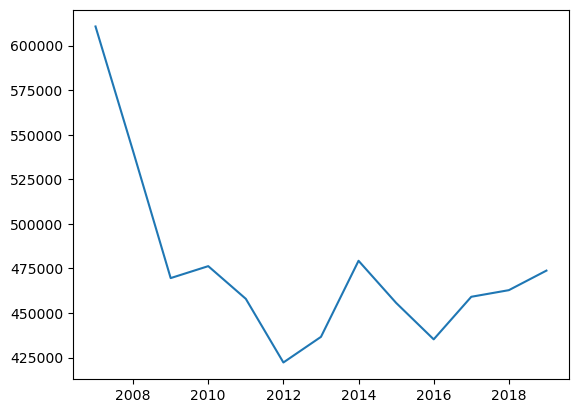

In [5]:
plt.plot(ele)
plt.show()

## 중학교 입학

In [6]:
f = open('./03-중학교/334_DT_1963003_003_20211026142206.csv')
data = csv.reader(f)

middle = pd.DataFrame(data)
middle = middle.rename(columns=middle.iloc[0])
middle = middle.drop(middle.index[0])
middle.head(20)
middle = middle.iloc[9]
middle = middle.drop(middle.index[0:6])
middle = middle.drop(middle.index[-2:])
middle = pd.to_numeric(middle)
middle = pd.DataFrame(middle.values.reshape(1,-1), columns=c,index=['중학교'])
middle = middle.T
middle

,중학교
2007,679762
2008,675779
2009,652115
2010,644140
2011,622095
2012,596671
2013,610898
2014,528611
2015,466948
2016,470697


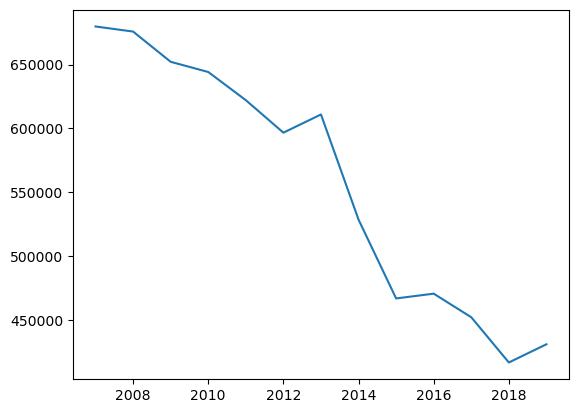

In [7]:

plt.plot(middle)
plt.show()

## 고등학교 입학

In [8]:
f = open('./04-고등학교/334_DT_1963003_004_20211026142403.csv')
data = csv.reader(f)
high = pd.DataFrame(data)
high = high.rename(columns=high.iloc[0])
high = high.drop(high.index[0])
high.head(20)
high = high.iloc[14]
high = high.drop(high.index[0:6])
high = high.drop(high.index[-2:])
high = pd.to_numeric(high)
high = pd.DataFrame(high.values.reshape(1,-1), columns=c, index=["고등학교"])
high = high.T
high


,고등학교
2007,669850
2008,681444
2009,670486
2010,663457
2011,665423
2012,645268
2013,634699
2014,606063
2015,586983
2016,592116


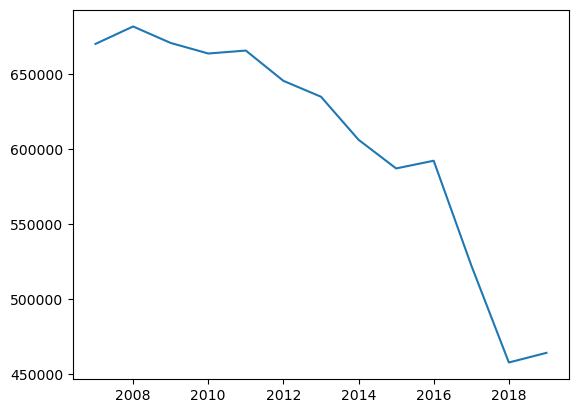

In [9]:

plt.plot(high)
plt.show()

## 종합 입학

In [10]:
total = ele["초등학교"] + middle["중학교"] + high["고등학교"]
#total = pd.DataFrame(total.to_frame(), columns=c, index=["전체"])
student = pd.DataFrame(total, columns=["전체"])
student = student.join(ele).join(middle).join(high)
student

,전체,초등학교,중학교,고등학교
2007,1960381,610769,679762,669850
2008,1898022,540799,675779,681444
2009,1792193,469592,652115,670486
2010,1783888,476291,644140,663457
2011,1745475,457957,622095,665423
2012,1664181,422242,596671,645268
2013,1682218,436621,610898,634699
2014,1613978,479304,528611,606063
2015,1509610,455679,466948,586983
2016,1498033,435220,470697,592116


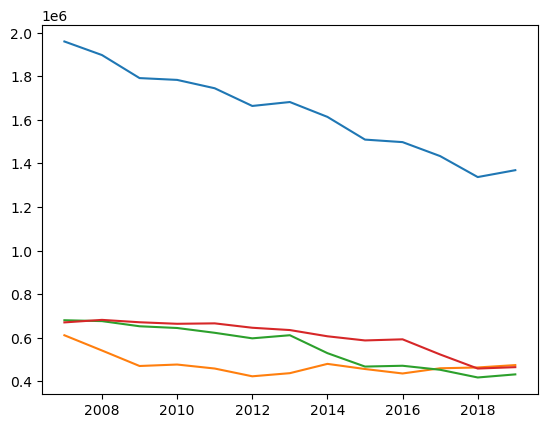

In [11]:
plt.plot(student)
plt.show()

## 입학자수-사교육비

In [12]:
one = cost["전체"] / student["전체"]
one = pd.DataFrame(one, columns=["전체"])
e = cost["초등학교"] / student["초등학교"]
m = cost["중학교"] / student["중학교"]
h = cost["고등학교"] / student["고등학교"]
one = one.join(e).join(m).join(h)
one

,전체,초등학교,중학교,고등학교
2007,0.102225,0.167163,0.082558,0.062971
2008,0.110165,0.192876,0.086027,0.068461
2009,0.120667,0.217868,0.096081,0.076503
2010,0.117002,0.203825,0.093762,0.077235
2011,0.115307,0.197532,0.096458,0.076341
2012,0.114408,0.183672,0.102505,0.080089
2013,0.110545,0.177213,0.094666,0.079965
2014,0.112949,0.158457,0.105329,0.083607
2015,0.118140,0.165219,0.112184,0.086331
2016,0.120562,0.177928,0.102193,0.092997


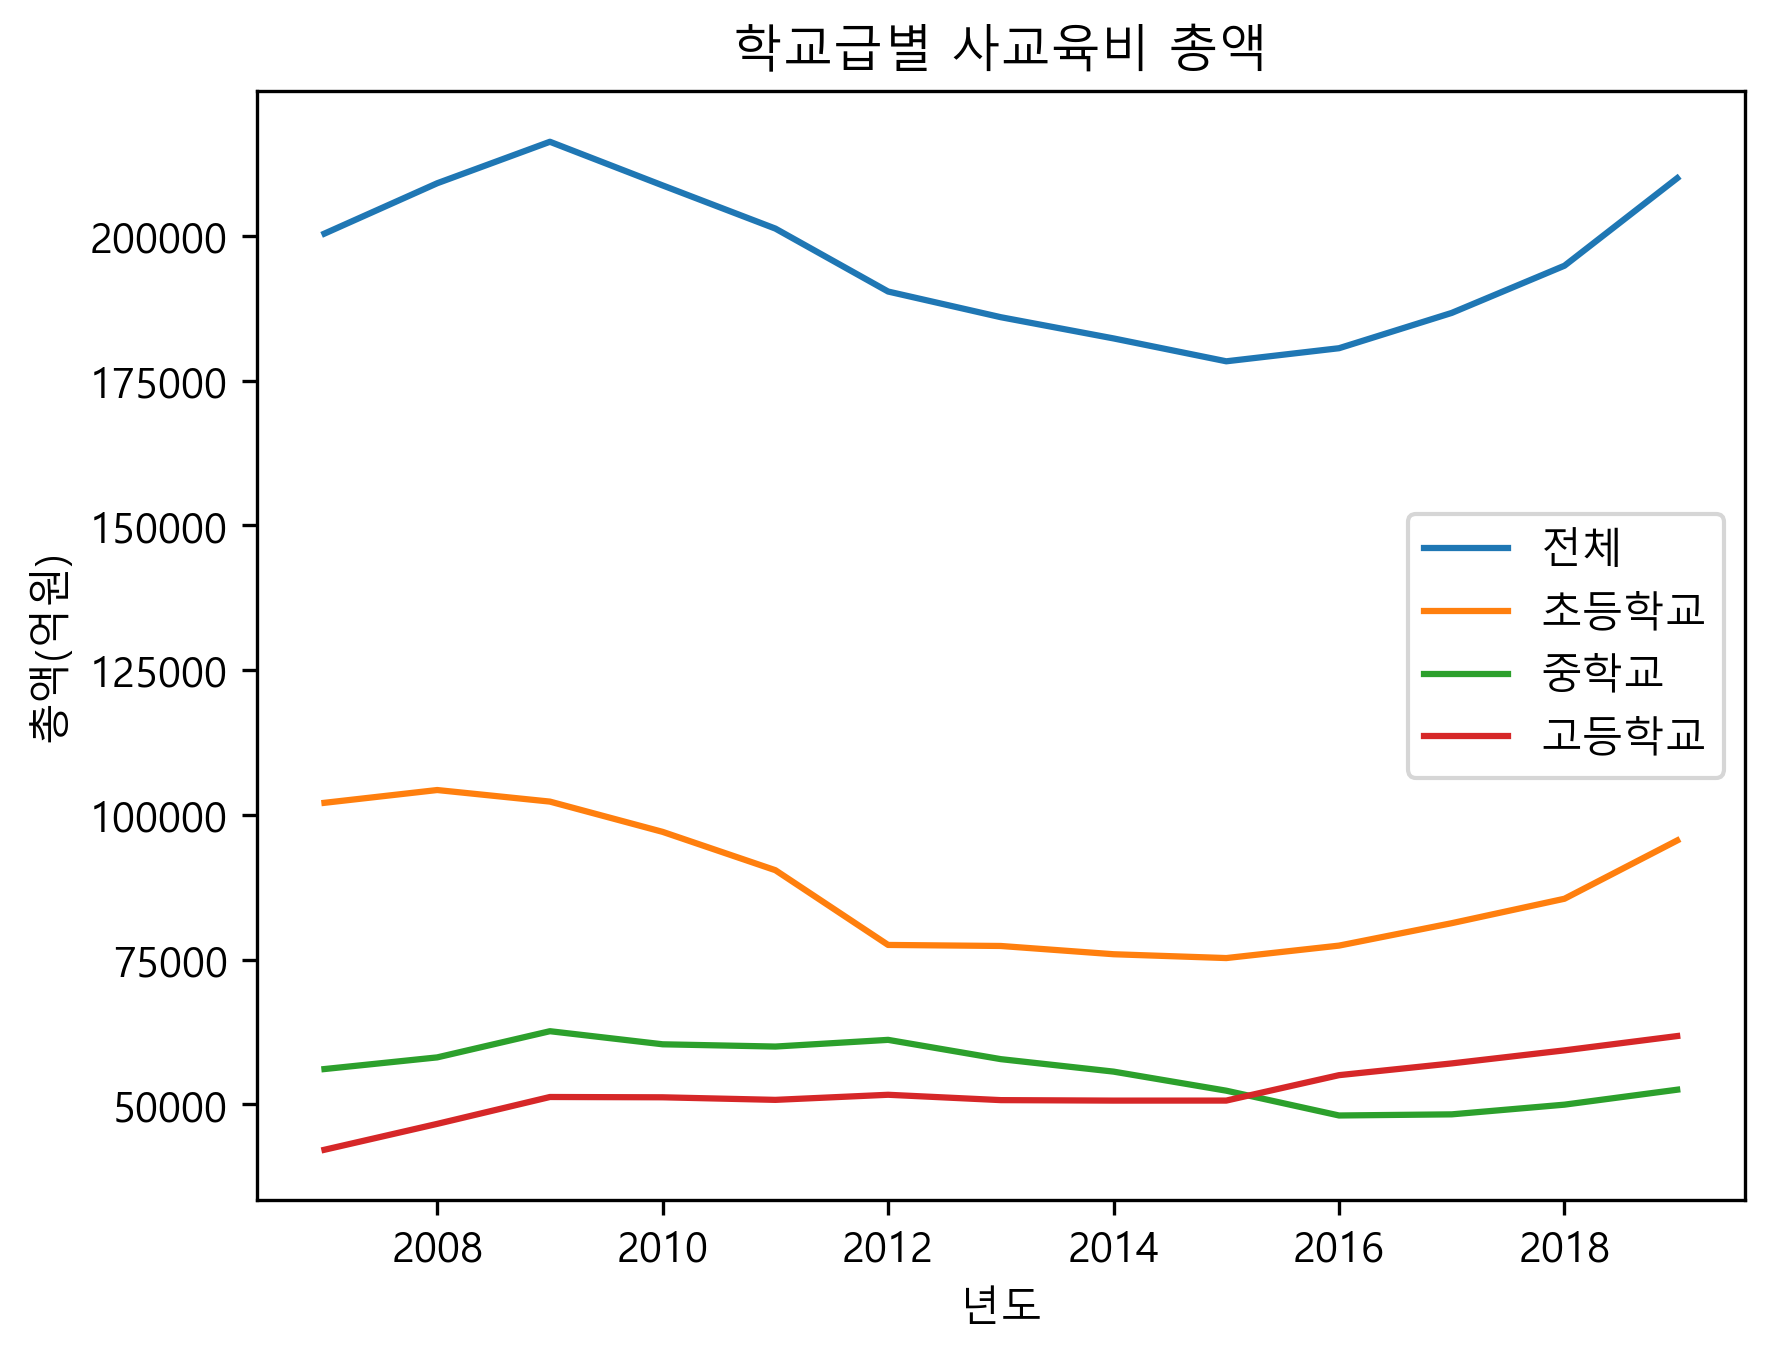

In [13]:
import os
fig = plt.figure(dpi=300)
plt.rc('font', family='Malgun Gothic')
ax = fig.add_subplot(111)
ax.plot(cost.index, cost["전체"], label="전체")
ax.plot(cost.index, cost["초등학교"], label="초등학교")
ax.plot(cost.index, cost["중학교"], label="중학교")
ax.plot(cost.index, cost["고등학교"], label="고등학교")
ax.set_title("학교급별 사교육비 총액")
ax.set_xlabel("년도")
ax.set_ylabel("총액(억원)")
ax.legend()
plt.show()

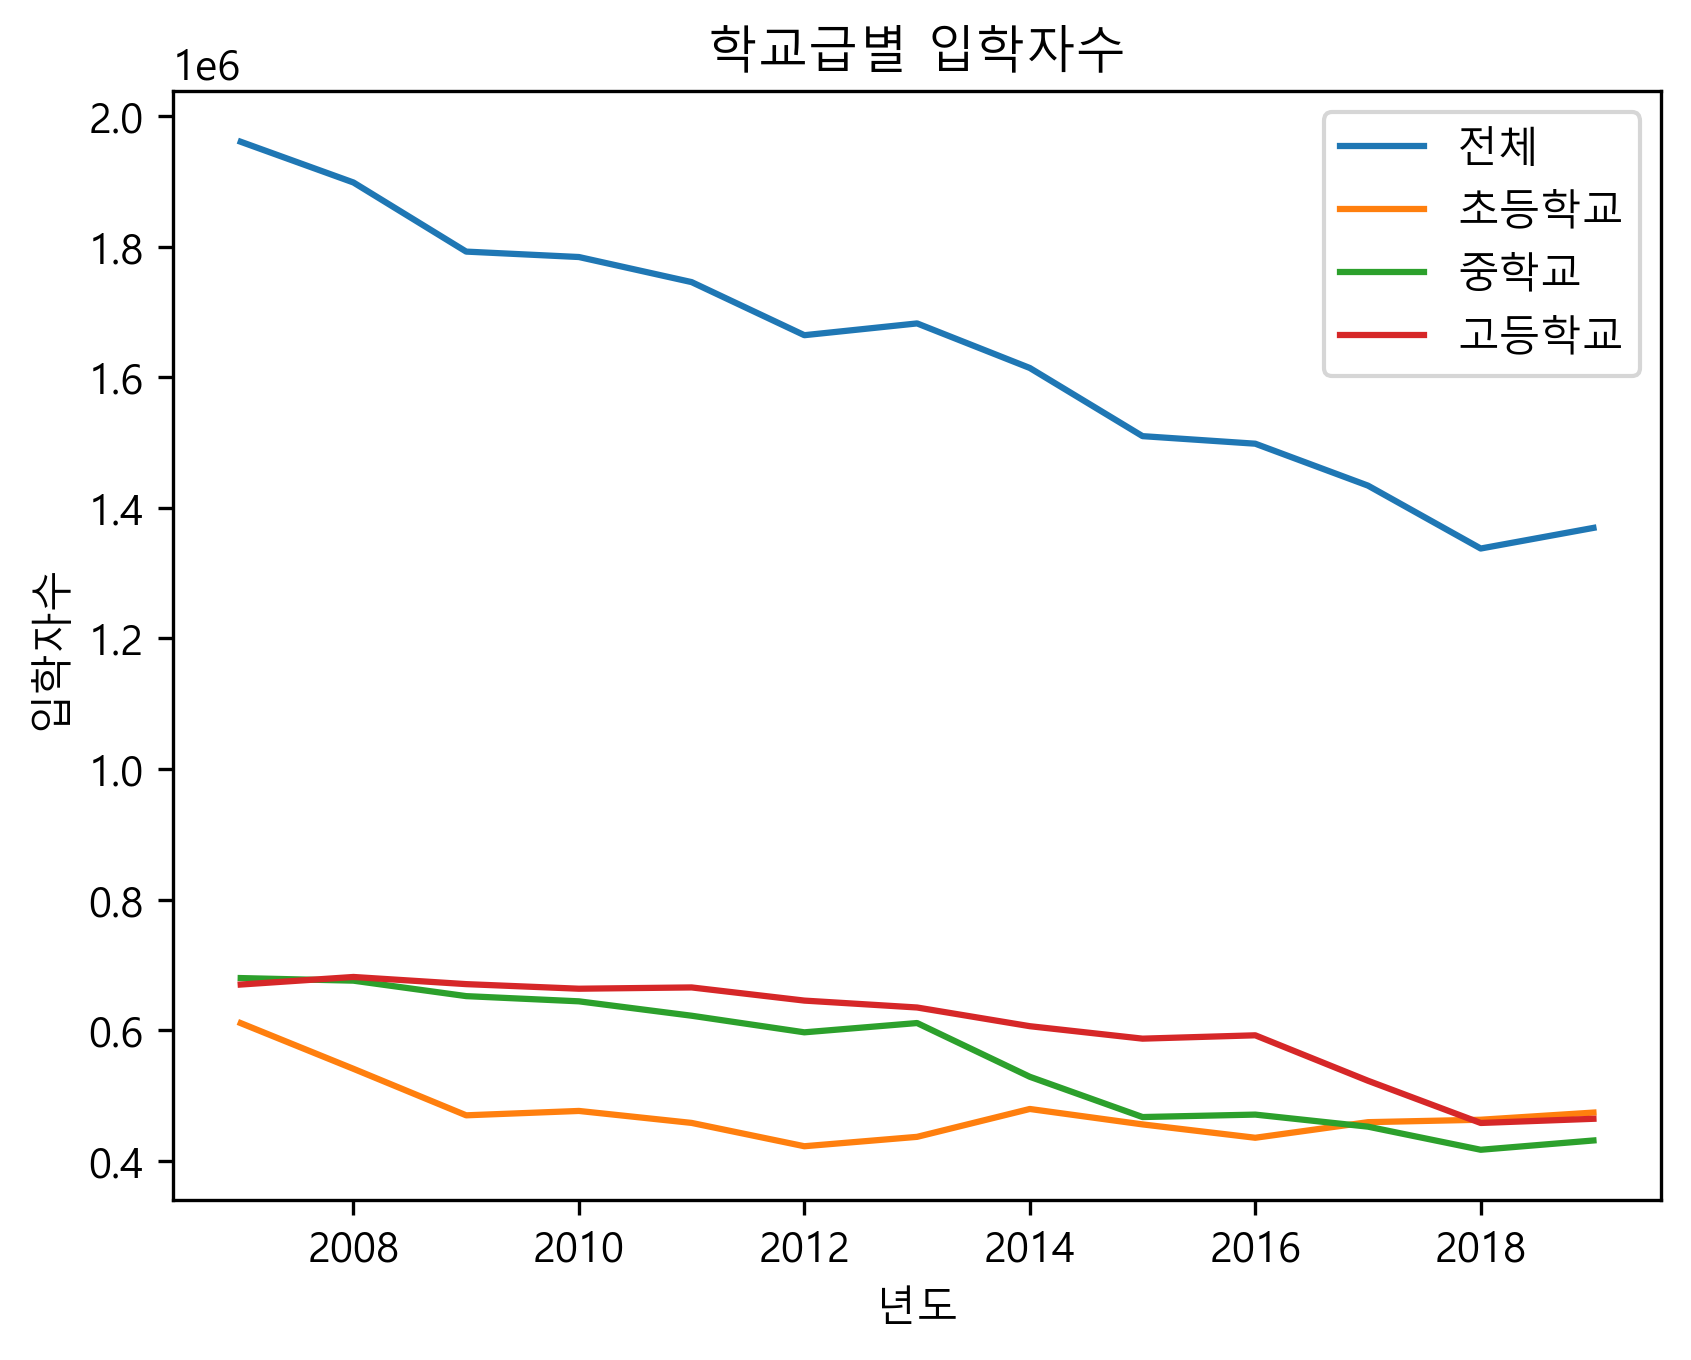

In [14]:
fig = plt.figure(dpi=300)
plt.rc('font', family='Malgun Gothic')
ax = fig.add_subplot(111)
ax.plot(student.index, student["전체"], label="전체")
ax.plot(student.index, student["초등학교"], label="초등학교")
ax.plot(student.index, student["중학교"], label="중학교")
ax.plot(student.index, student["고등학교"], label="고등학교")
ax.set_title("학교급별 입학자수")
ax.set_xlabel("년도")
ax.set_ylabel("입학자수")
ax.legend()
plt.show()

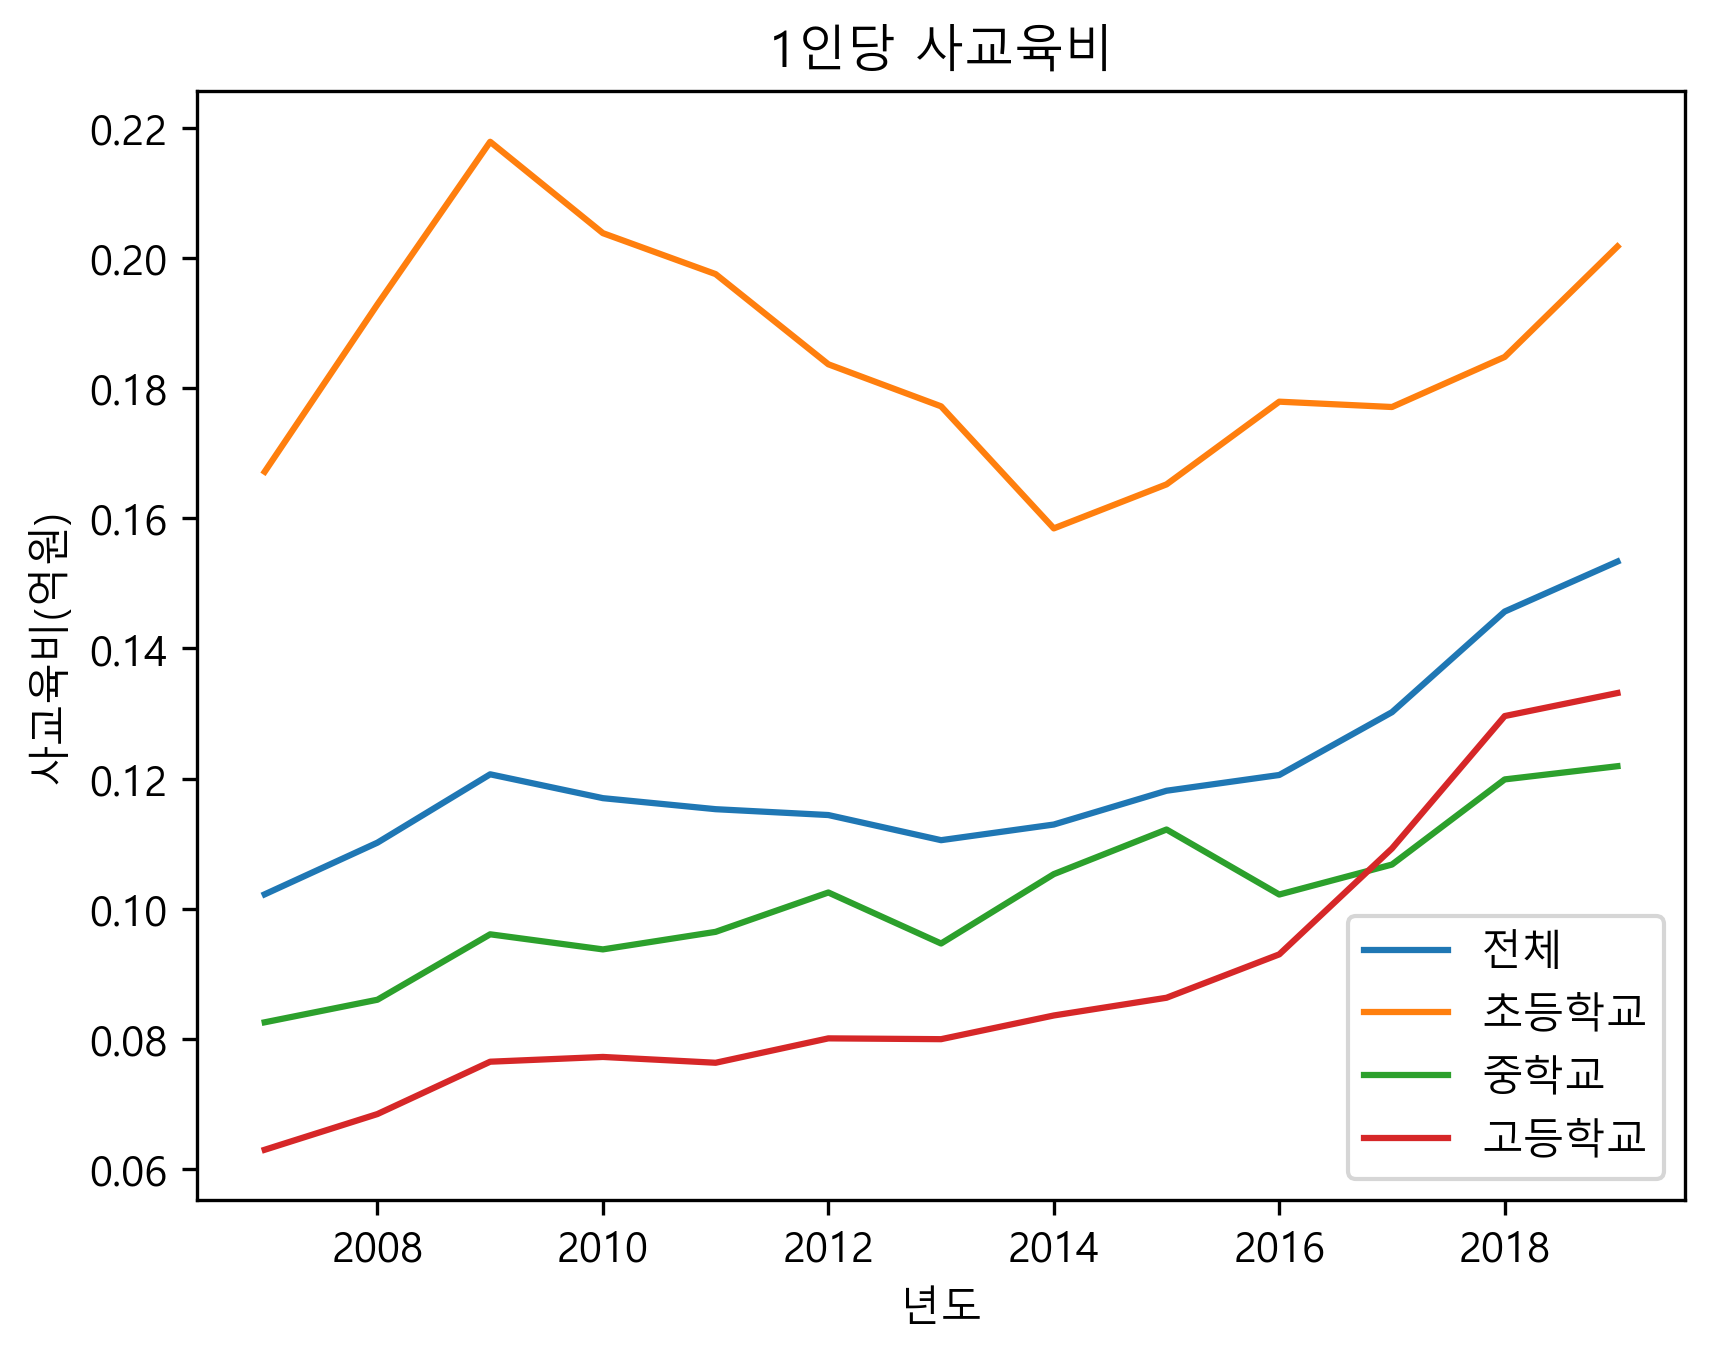

In [15]:
fig = plt.figure(dpi=300)
plt.rc('font', family='Malgun Gothic')
ax = fig.add_subplot(111)
ax.plot(one.index, one["전체"], label="전체")
ax.plot(one.index, one["초등학교"], label="초등학교")
ax.plot(one.index, one["중학교"], label="중학교")
ax.plot(one.index, one["고등학교"], label="고등학교")
ax.set_title("1인당 사교육비")
ax.set_xlabel("년도")
ax.set_ylabel("사교육비(억원)")
ax.legend()
plt.show()

## 출생아수

In [16]:
f = open('./00-출산율/시군구_성_월별_출생_20211101003031.csv')
data = csv.reader(f)

birth = pd.DataFrame(data)
birth = birth.rename(columns=birth.iloc[0])
birth = birth.drop(birth.index[0:2])
birth = birth.drop(['시군구별'], axis=1)
birth.set_axis(['출생아수'], axis=0, inplace=True)
birth = birth.astype(float)
birth = birth.T
birth

,출생아수
1997. 01,63268.0
1997. 02,58144.0
1997. 03,62160.0
1997. 04,56949.0
1997. 05,55270.0
...,...
2020. 08,22402.0
2020. 09,23499.0
2020. 10,21884.0
2020. 11,20054.0


Index(['1997. 01', '1998. 01', '1999. 01', '2000. 01', '2001. 01', '2002. 01',
       '2003. 01', '2004. 01', '2005. 01', '2006. 01', '2007. 01', '2008. 01',
       '2009. 01', '2010. 01', '2011. 01', '2012. 01', '2013. 01', '2014. 01',
       '2015. 01', '2016. 01', '2017. 01', '2018. 01', '2019. 01', '2020. 01'],
      dtype='object')


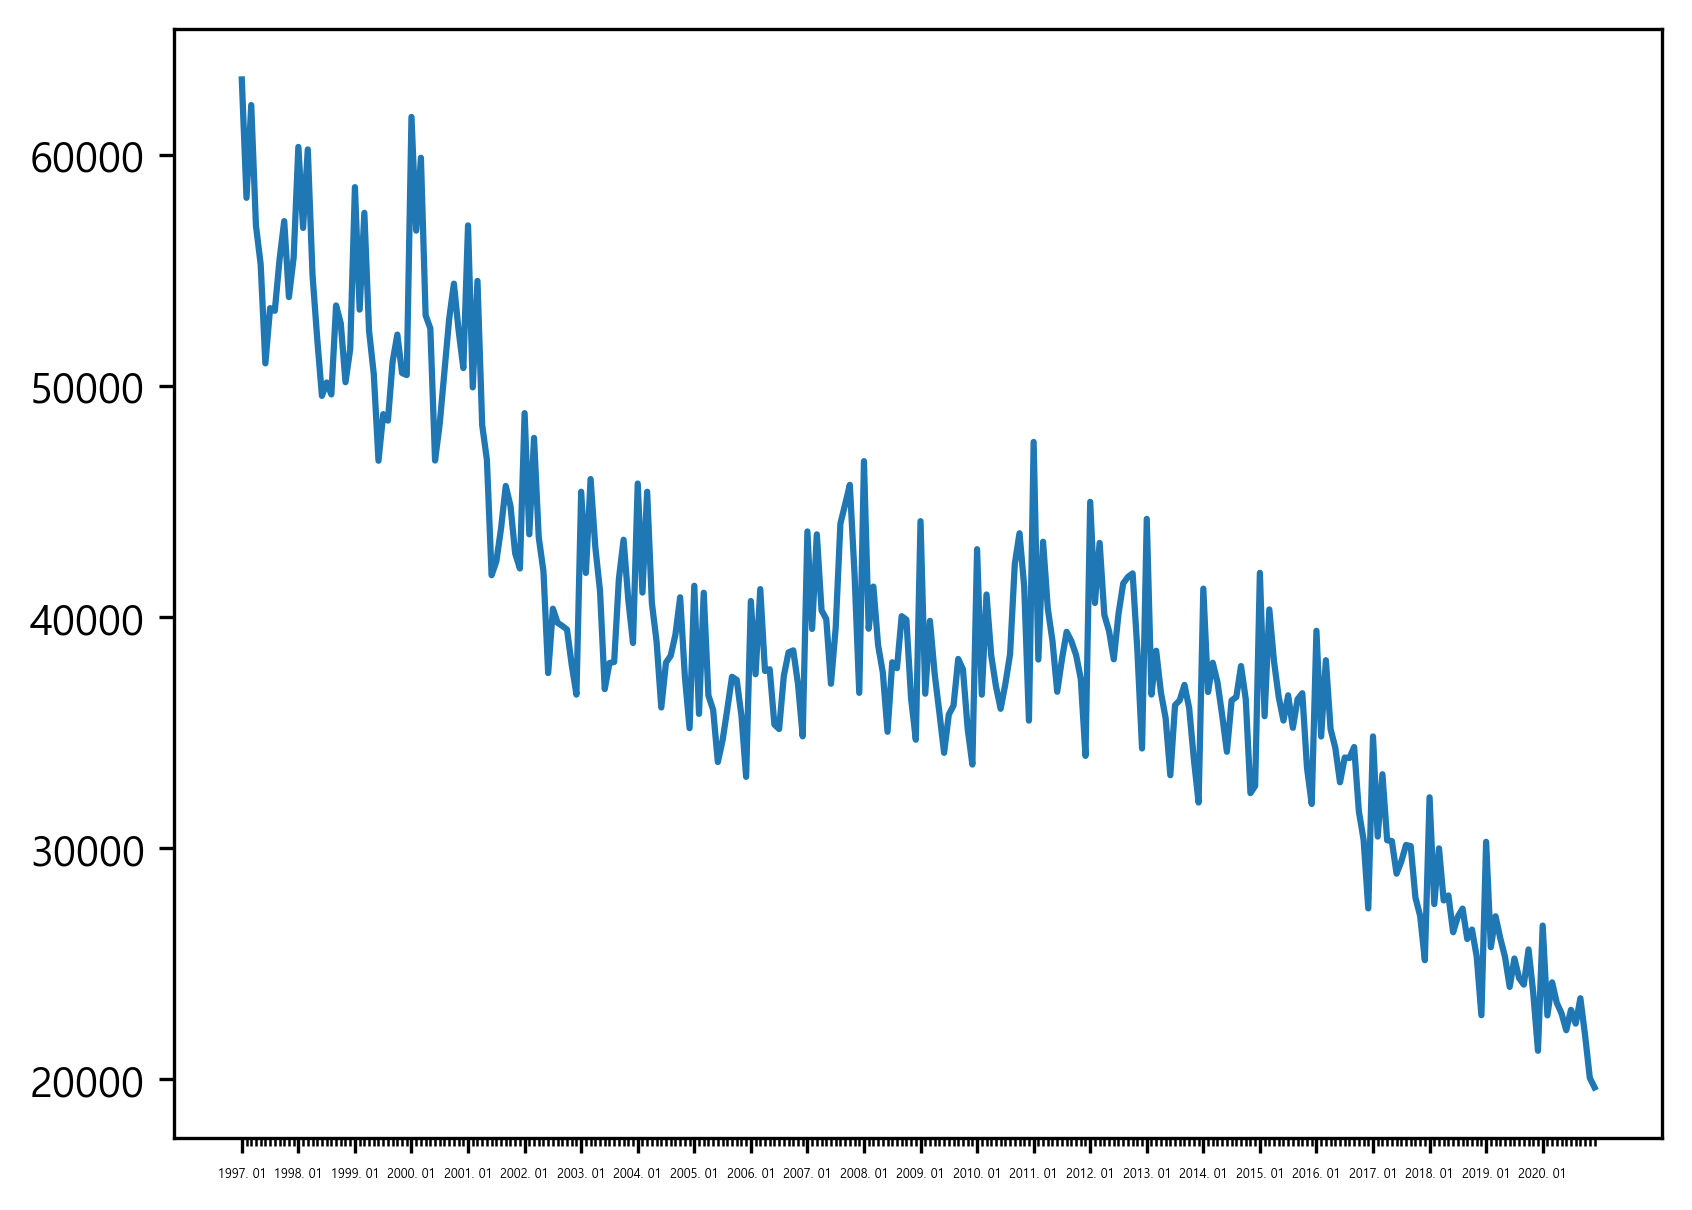

In [17]:
fig = plt.figure(dpi=300)
plt.rc('font', family='Malgun Gothic')
plt.rc('xtick', labelsize=3)
ax = fig.add_subplot(111)
major_xticks = birth.index[::12]
print(major_xticks)
minor_xticks = birth.index
ax.plot(birth)
ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks,
             minor=True)
plt.show()

## 소비자물가지수-지출목적: 교육

In [18]:
f = open('./05-소비자물가지수/지출목적별_소비자물가지수_품목_포함__2015100__20211101155528.csv')
data = csv.reader(f)

cpi_e = pd.DataFrame(data)
cpi_e = cpi_e.rename(columns=cpi_e.iloc[0])
cpi_e = cpi_e.drop(cpi_e.index[0])
cpi_e = cpi_e.drop(['시도별', '지출목적별'], axis=1)
cpi_e.set_axis(['cpi'], axis=0, inplace=True)
cpi_e = cpi_e.astype(float)
cpi_e = cpi_e.T
cpi_e

,cpi
1997. 01,50.935
1997. 02,51.159
1997. 03,53.080
1997. 04,53.437
1997. 05,53.571
...,...
2021. 05,101.660
2021. 06,101.690
2021. 07,101.740
2021. 08,101.790


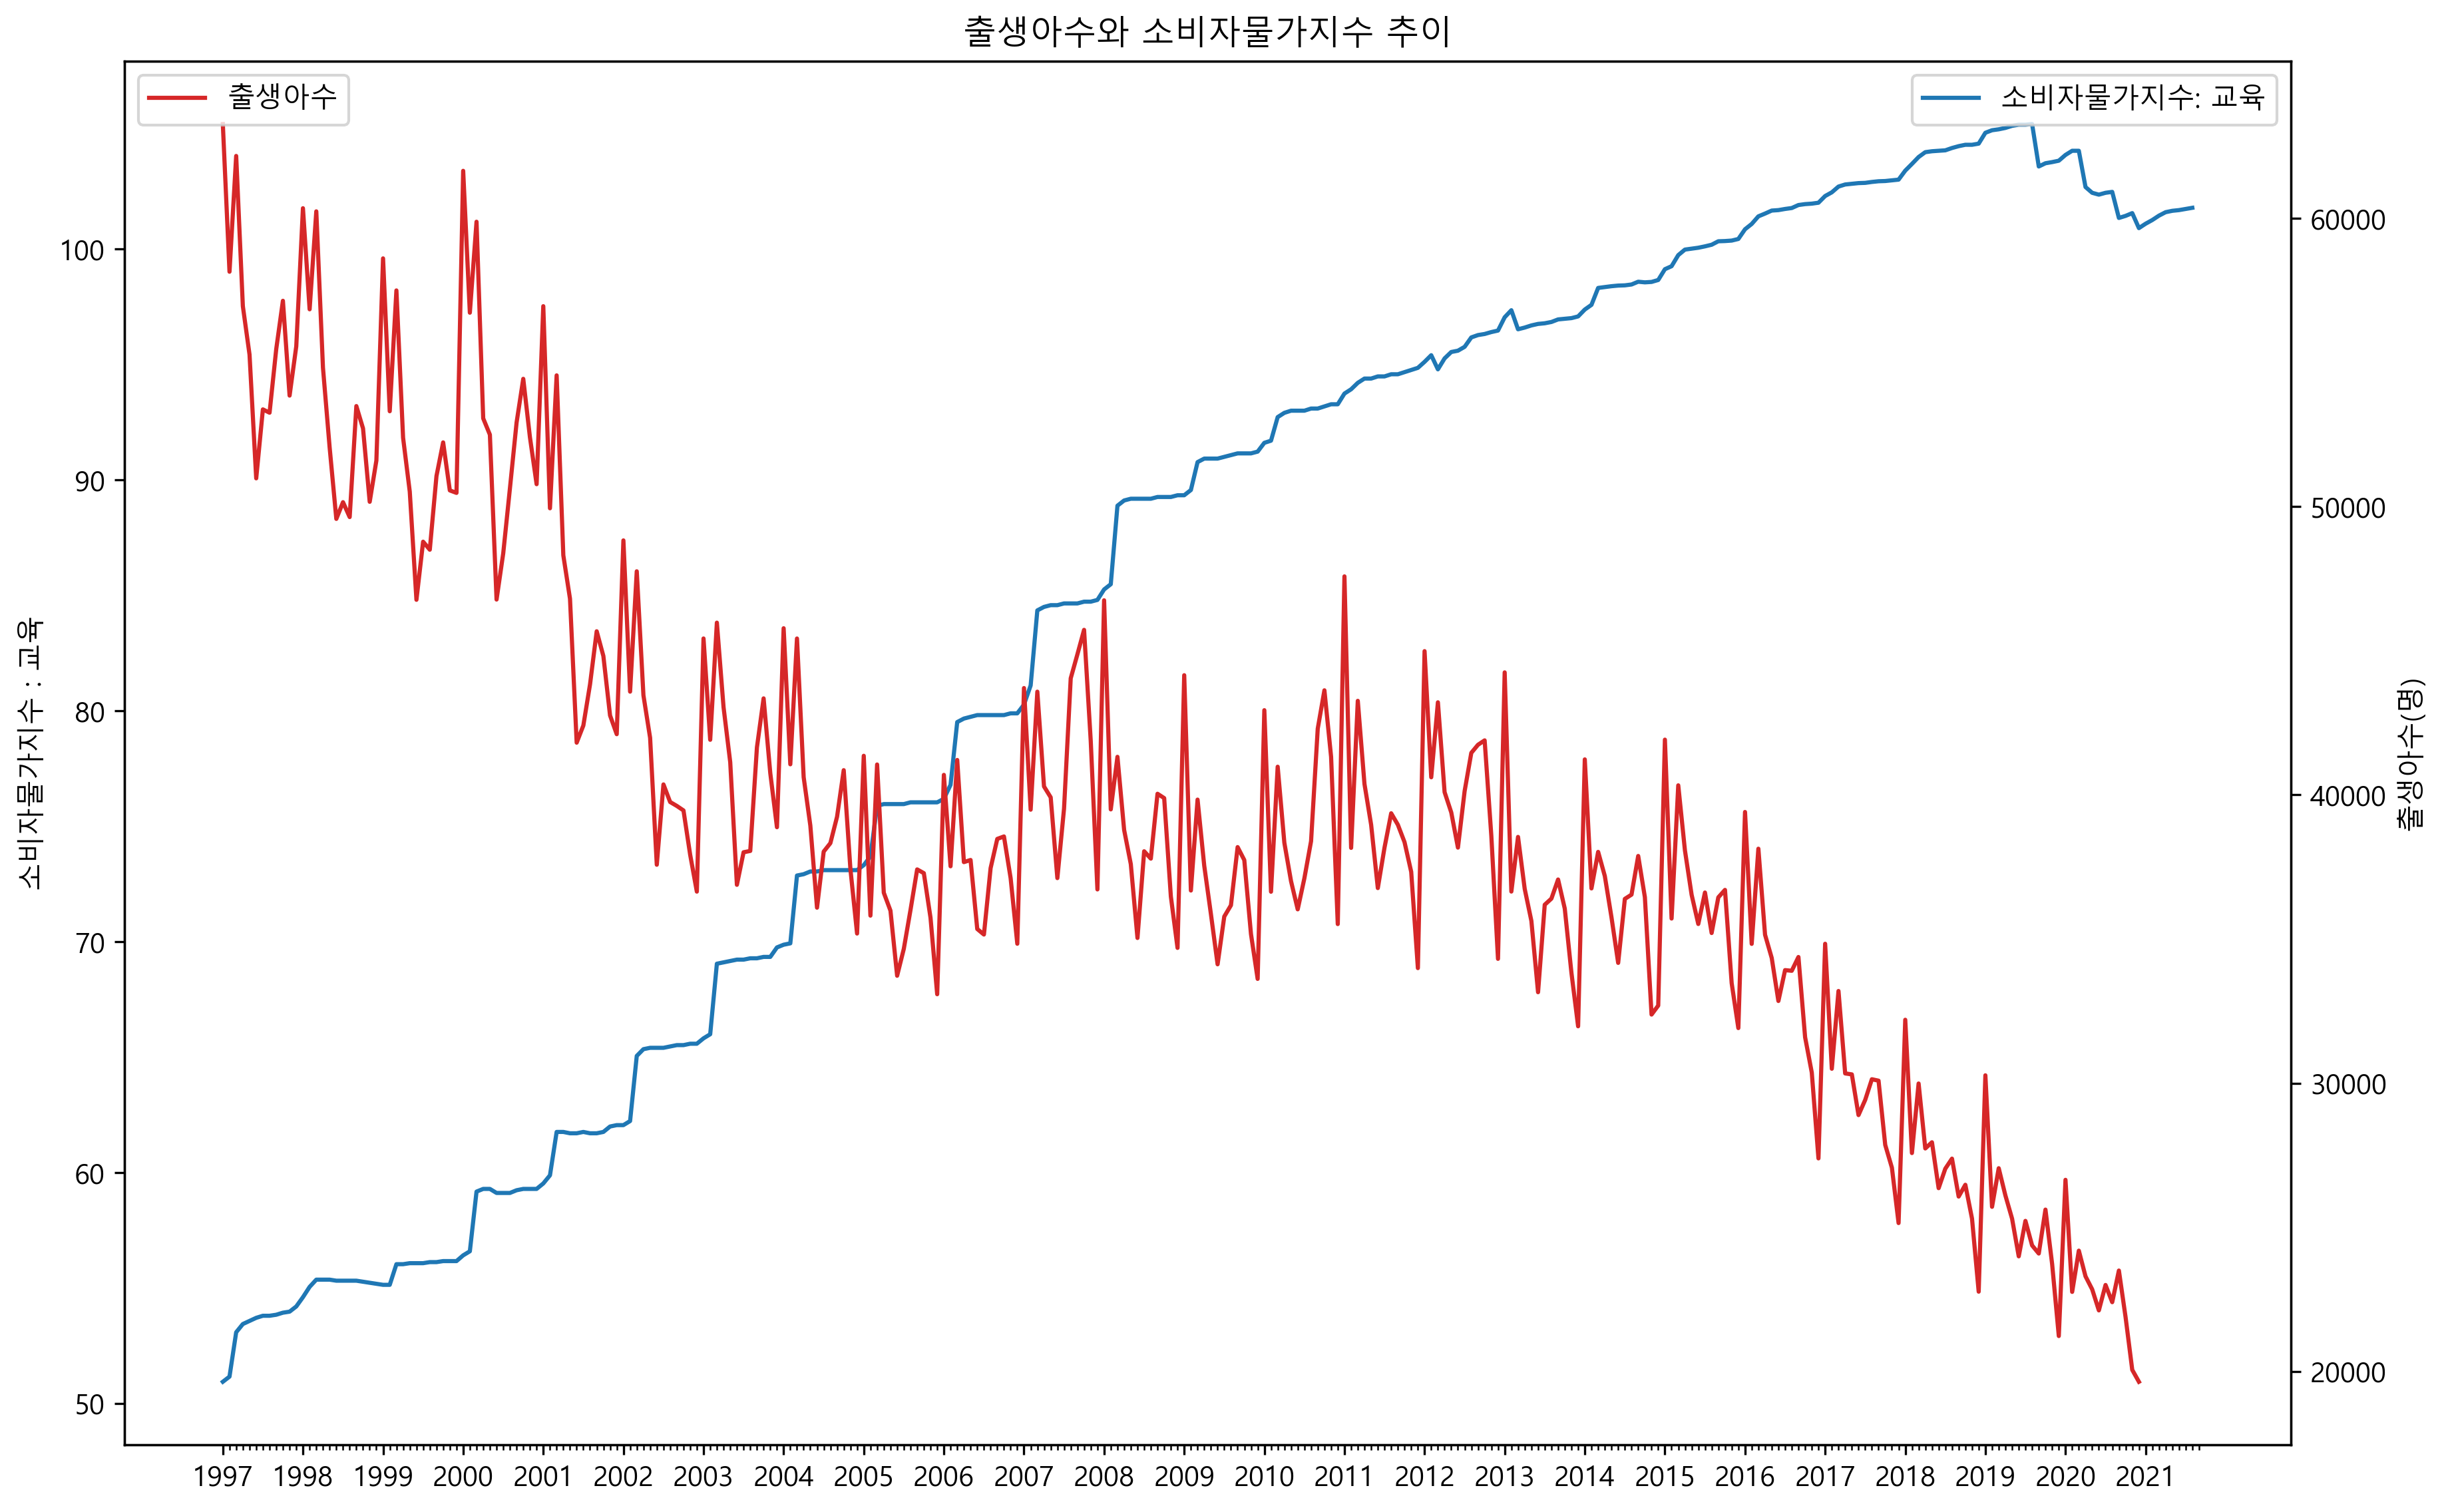

In [19]:

fig = plt.figure(dpi=300, figsize=(14,9))
plt.rc('font', family='Malgun Gothic')
plt.rc('xtick', labelsize=10)
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
major_xticks = cpi_e.index[::12]
major_xticks_int = [int(i[0:4]) for i in major_xticks]
minor_xticks = cpi_e.index
ax1.plot(cpi_e[:-1], color='tab:blue',  label="소비자물가지수: 교육")
major_xticks = cpi_e.index[::12]
minor_xticks = cpi_e.index
ax1.set_xticks(major_xticks)
ax1.set_xticks(minor_xticks,
              minor=True)
ax1.set_ylabel('소비자물가지수 : 교육')

# major_xticks = birth.index[::12]
# minor_xticks = birth.index
ax2.set_xticks(major_xticks)
ax2.set_xticks(minor_xticks,
              minor=True)
ax2.plot(birth, color='tab:red', label='출생아수')
ax2.set_ylabel('출생아수(명)')

ax1.legend(loc='upper right')
ax2.legend(loc='upper left')

ax1.set_title("출생아수와 소비자물가지수 추이")

plt.xticks(major_xticks, major_xticks_int)
# plt.grid(True)

plt.savefig('./plot/출생아수와 소비자물가지수 추이', transparent = True)
plt.show()

In [20]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap
bone_t = truncate_colormap(plt.get_cmap("bone"), 0.5, 1)
twilight_shifted_t = truncate_colormap(plt.get_cmap("twilight_shifted"), 0.3, 0.85)
pink_t = truncate_colormap(plt.get_cmap("pink"), 0.15, 0.65)

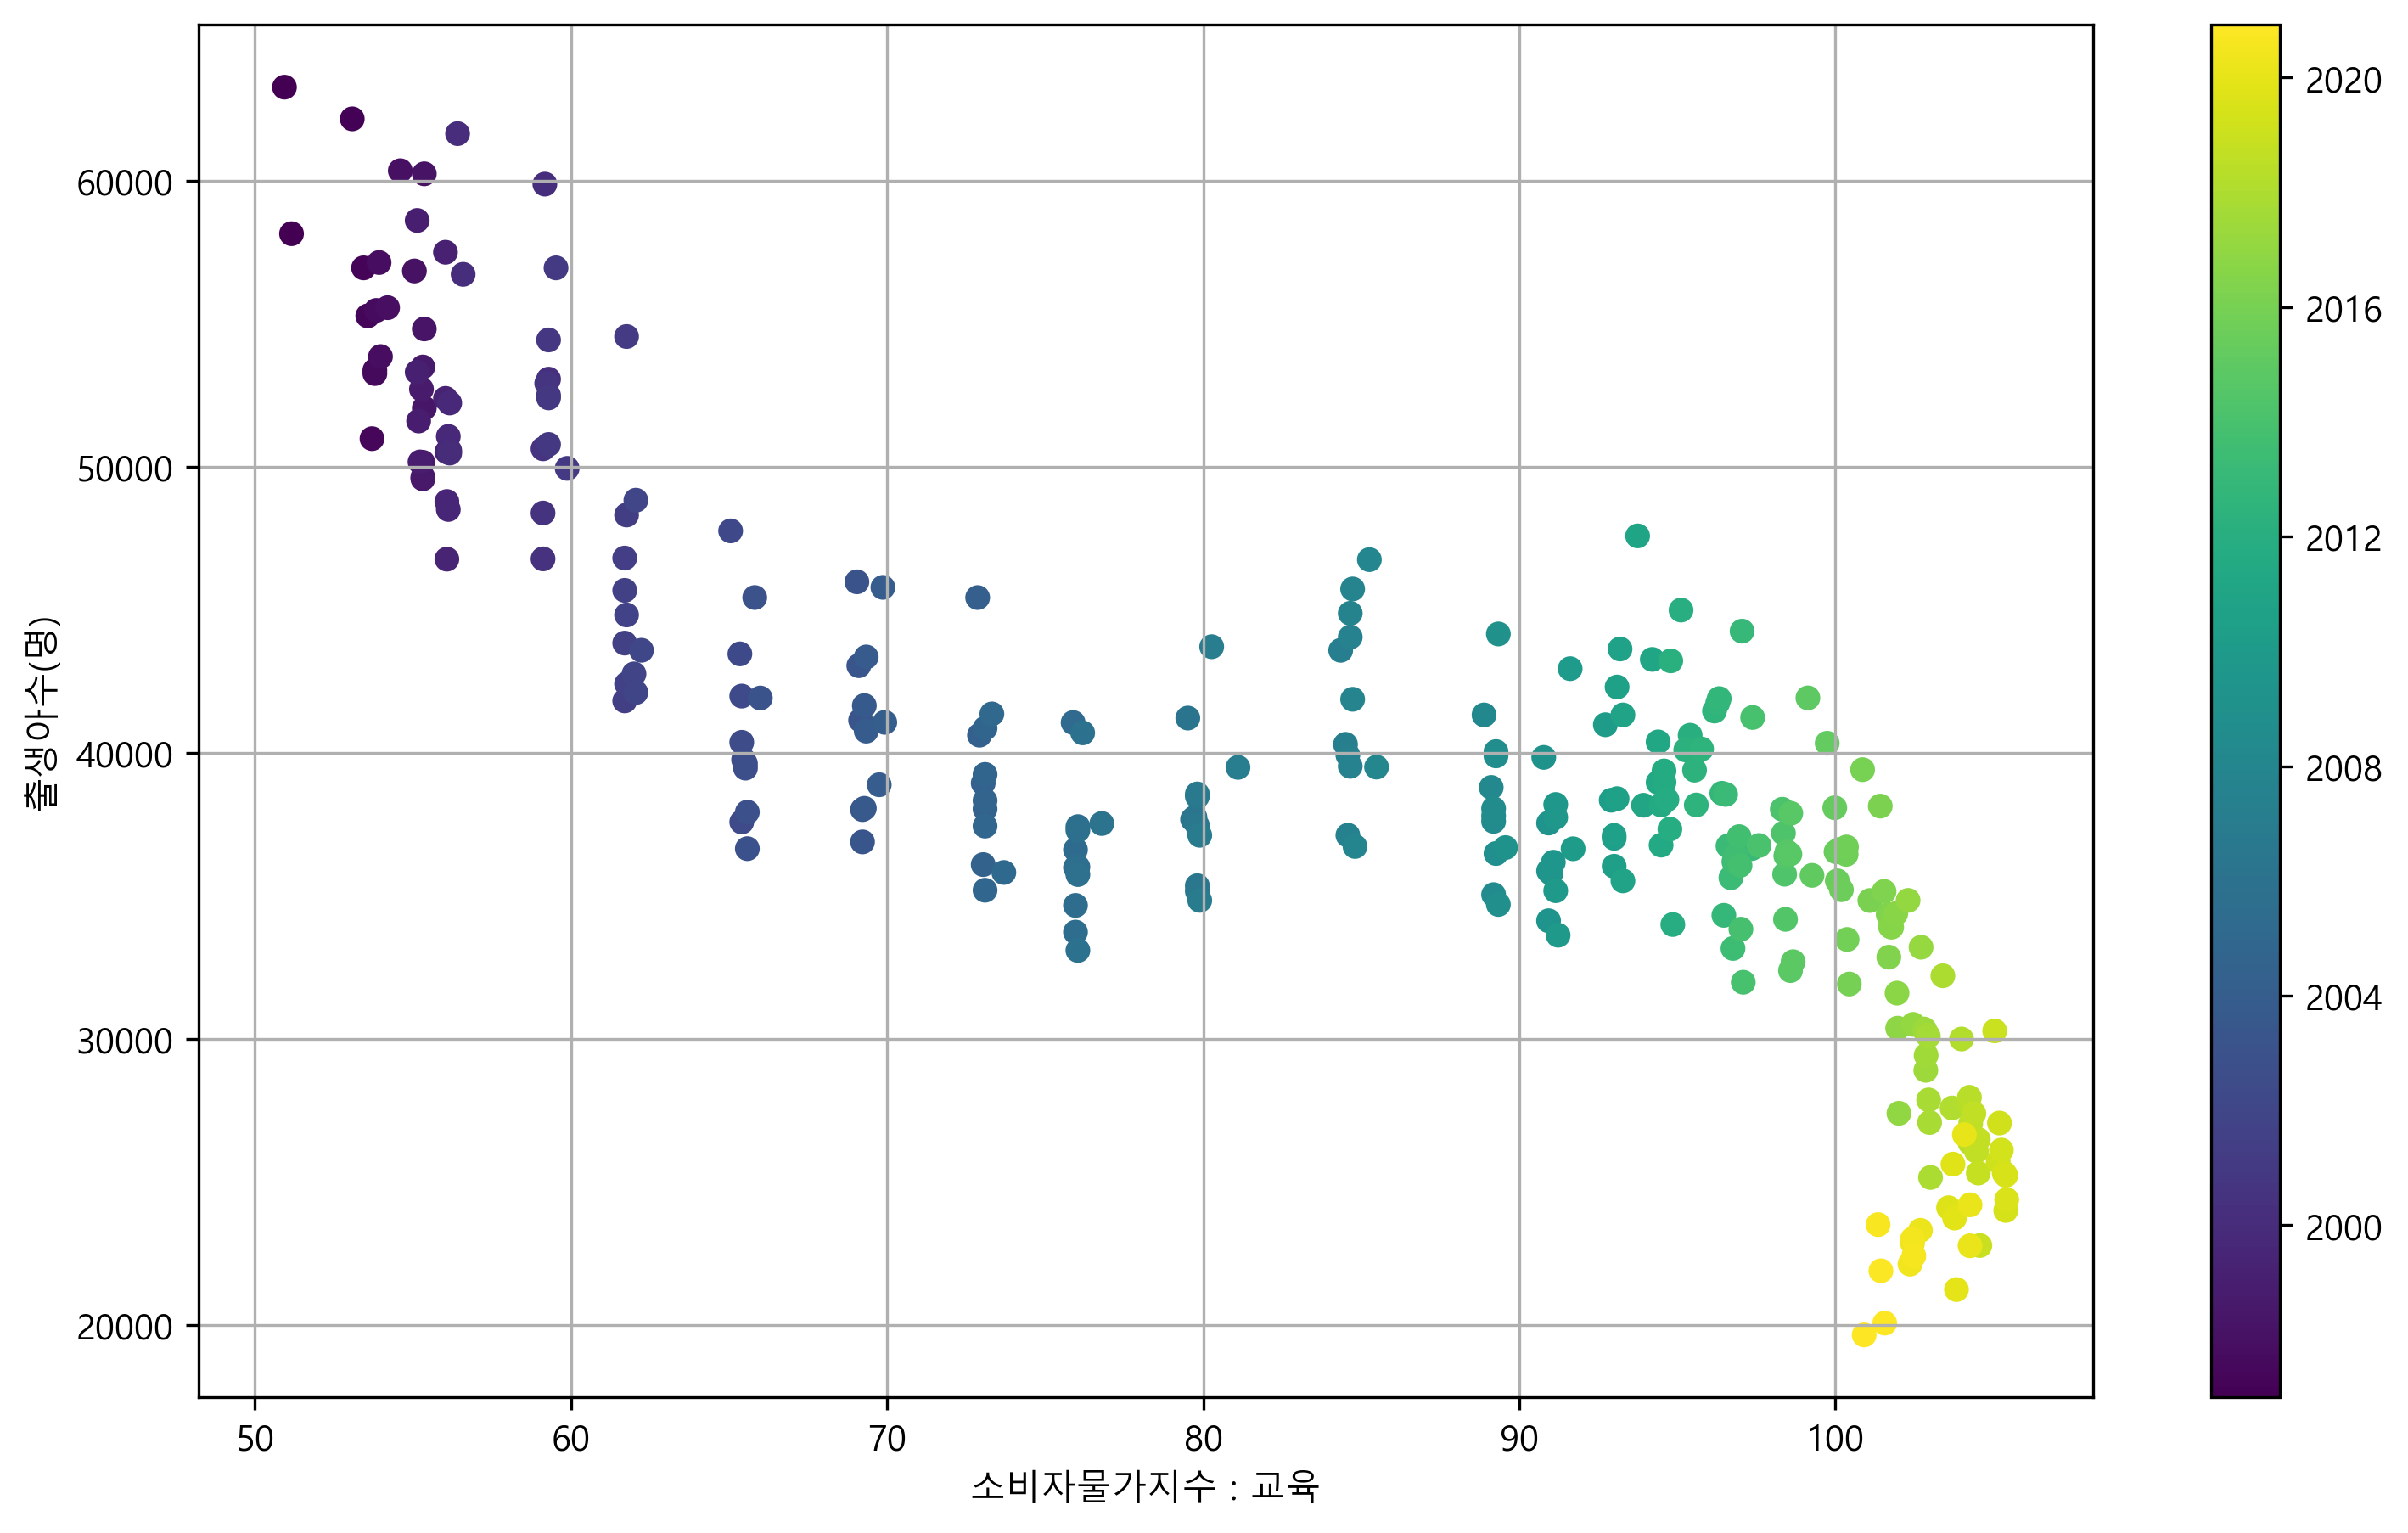

In [21]:

fig = plt.figure(dpi=300, figsize=(12,7))
plt.rc('font', family='Malgun Gothic')
ax = fig.add_subplot(111)

date = birth.index.tolist()

colors=[mdates.date2num(datetime.strptime(i,'%Y. %m')) for i in date]
    
sc = ax.scatter(cpi_e[:'2020. 12'], birth, c=colors, cmap="viridis")
ax.set_xlabel("소비자물가지수 : 교육")
ax.set_ylabel("출생아수(명)")
loc = mdates.AutoDateLocator()
plt.colorbar(sc, ticks=loc, format=mdates.AutoDateFormatter(loc))
# ax.set_title("출생아수와 소비자물가지수 비교")
plt.grid(True)

plt.savefig('./plot/출생아수와 소비자물가지수 비교', transparent = True)
plt.show()
plt.style.use('default')

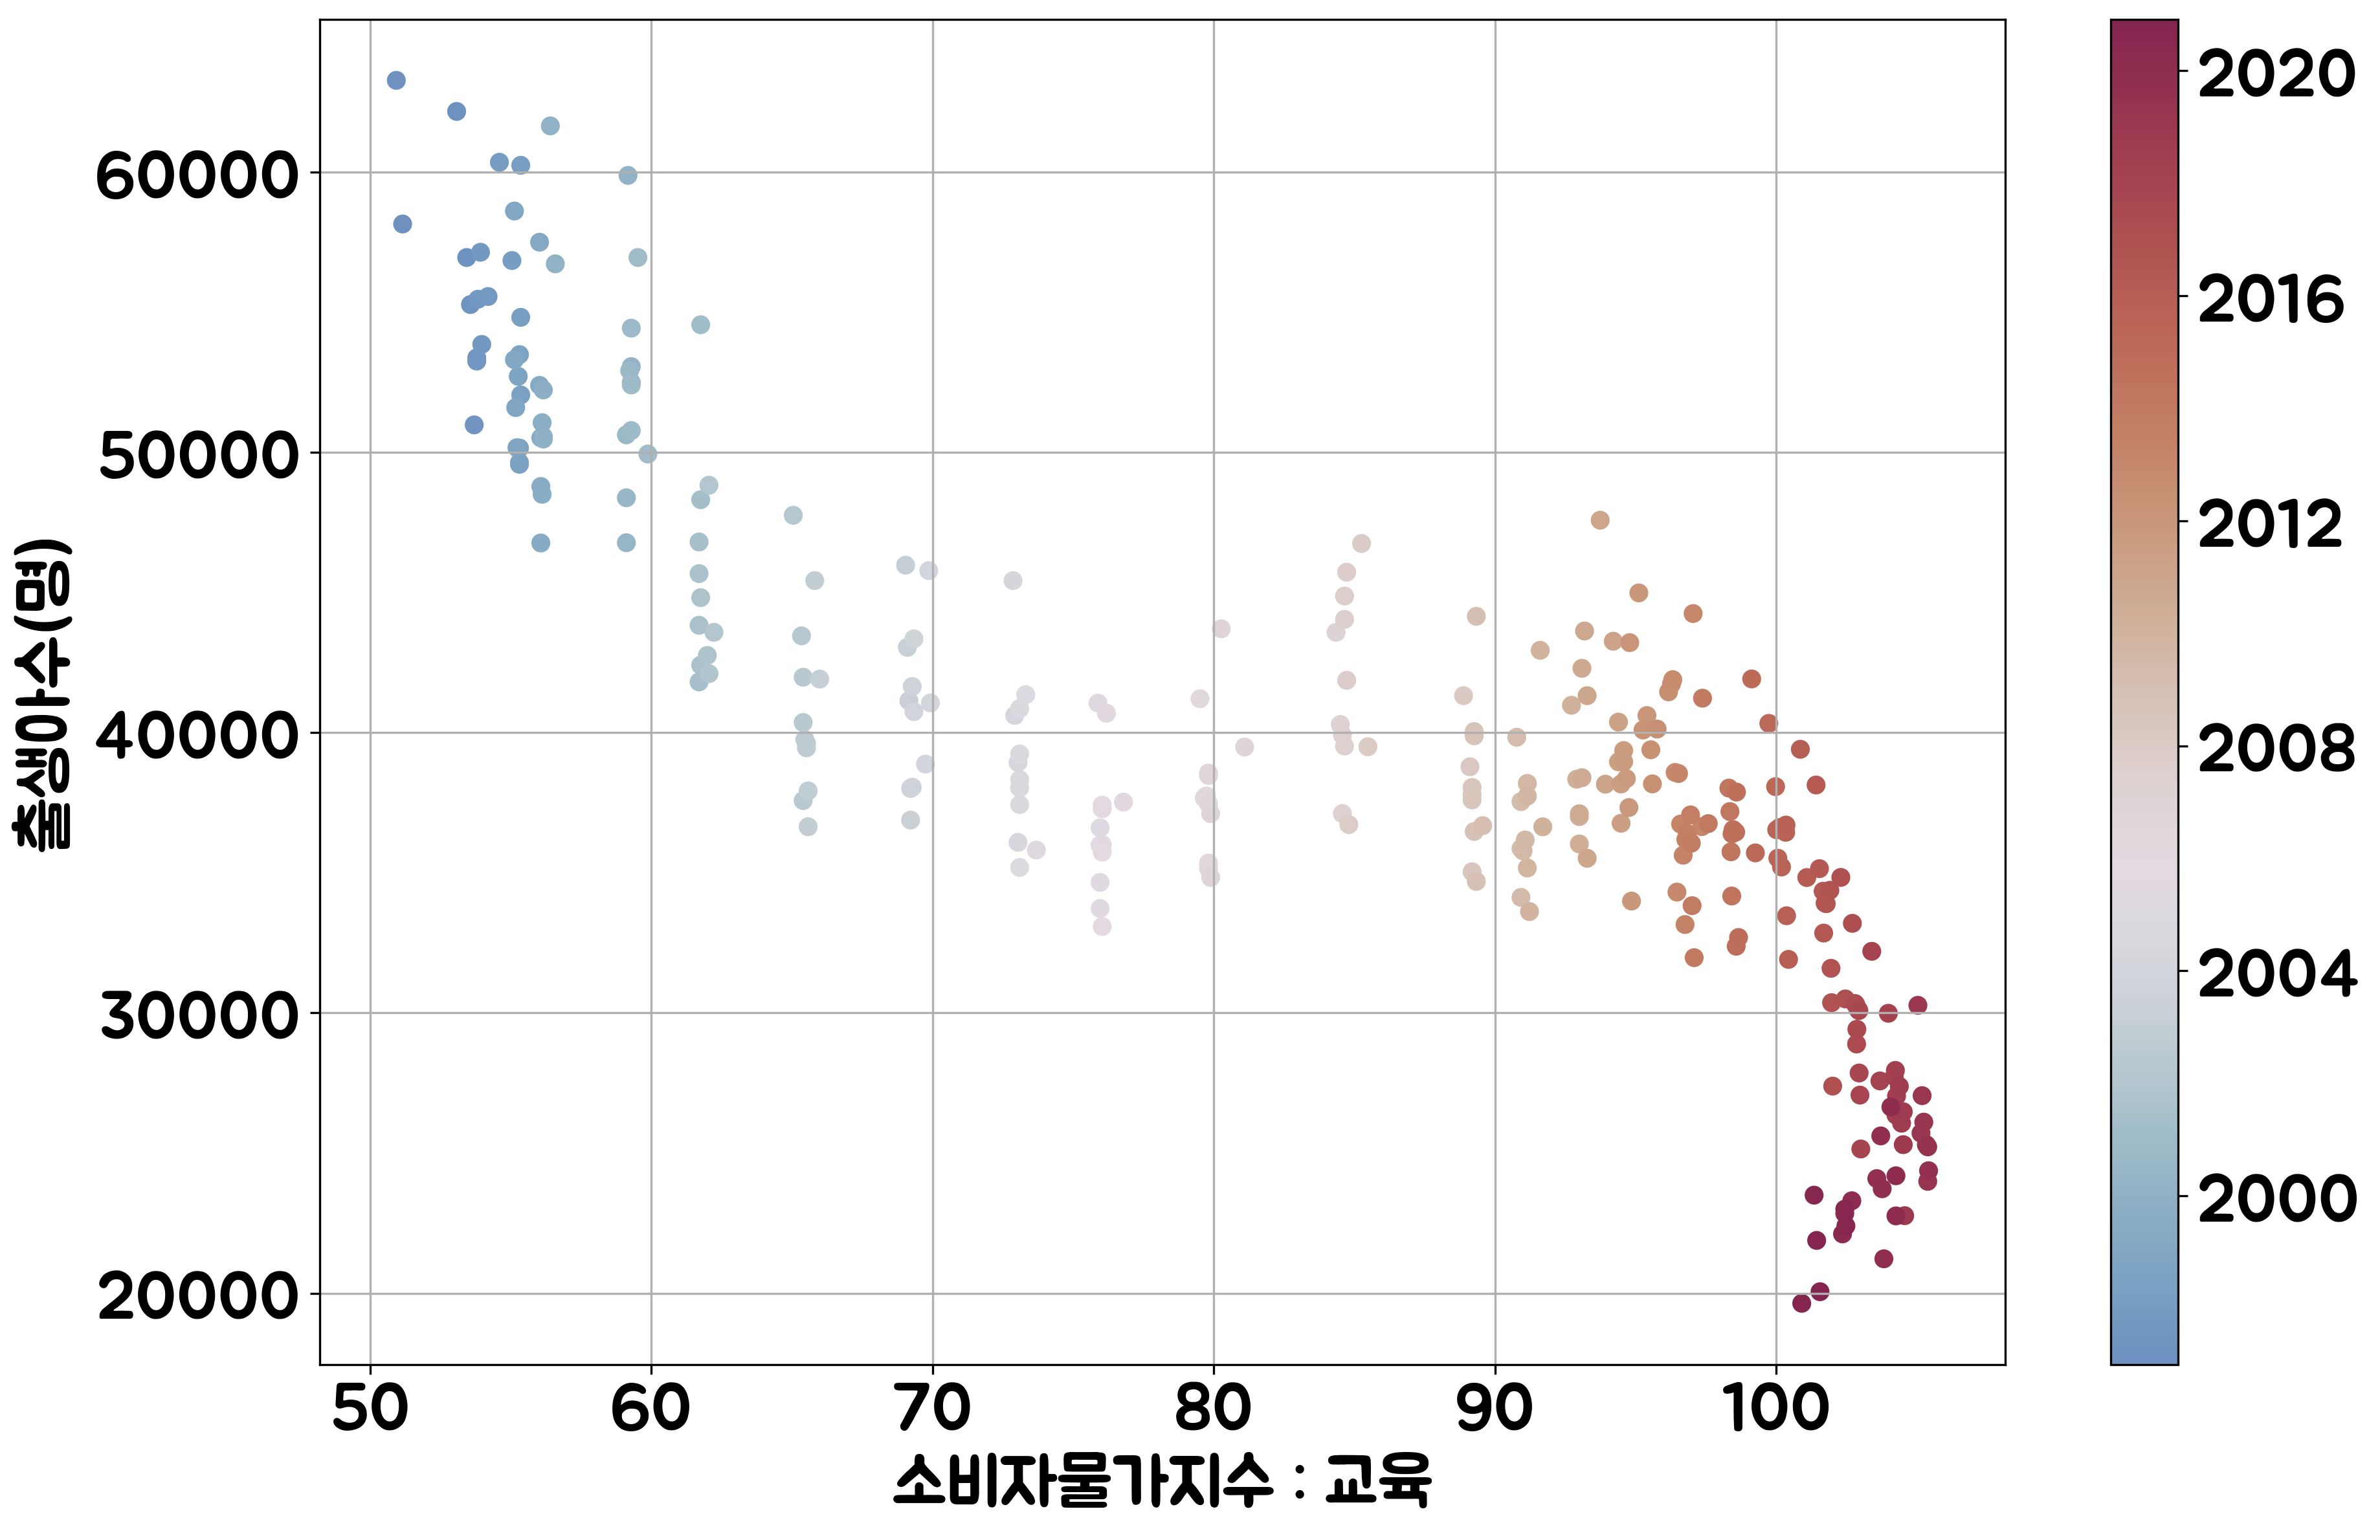

In [22]:
plt.style.use('default')
fig = plt.figure(dpi=300, figsize=(14,9))
plt.rc('font', family="BM JUA_TTF")
parameters = {'axes.labelsize': 25,
          'axes.titlesize': 35}
plt.rcParams.update(parameters)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
ax = fig.add_subplot(111)

date = birth.index.tolist()

colors=[mdates.date2num(datetime.strptime(i,'%Y. %m')) for i in date]
    
sc = ax.scatter(cpi_e[:'2020. 12'], birth, c=colors, cmap=twilight_shifted_t)
ax.set_xlabel("소비자물가지수 : 교육")
ax.set_ylabel("출생아수(명)")
loc = mdates.AutoDateLocator()
plt.colorbar(sc, ticks=loc, format=mdates.AutoDateFormatter(loc))
# ax.set_title("출생아수와 소비자물가지수 비교")
plt.grid(True)

plt.savefig('./plot/출생아수와 소비자물가지수 비교', transparent = True)
plt.show()

### 세부항목

In [23]:
f = open('./05-소비자물가지수/지출목적별_소비자물가지수_품목_포함__2015100__20211102020425.csv')
data = csv.reader(f)

cpi_d = pd.DataFrame(data)
cpi_d = cpi_d.rename(columns=cpi_d.iloc[0])
cpi_d = cpi_d.drop(cpi_d.index[0])
cpi_d = cpi_d.T
cpi_d = cpi_d.rename(columns=cpi_d.iloc[1])
cpi_d = cpi_d.drop(cpi_d.index[0:2])
cpi_d = cpi_d.replace('-', np.nan)
cpi_d = cpi_d.astype(float)
cpi_d

,0 총지수,10 교육,10.1 유치원 및 초등교육,유치원 및 초등교육,유치원납입금,10.2 중등교육,중등교육,고등학교납입금,10.3 고등교육,고등교육,...,미술학원비,운동학원비,전산학원비,가정학습지,이러닝이용료,학교보충교육비,성인학원 및 기타교육,취업학원비,외국어학원비,운동강습료
1997. 01,58.808,50.935,49.317,49.317,49.317,72.055,72.055,72.048,49.504,49.504,...,52.802,49.638,58.130,61.418,NaN,NaN,54.584,48.493,48.631,67.388
1997. 02,59.136,51.159,49.360,49.360,49.360,72.055,72.055,72.048,49.504,49.504,...,52.997,49.774,58.497,62.645,NaN,NaN,55.179,48.621,50.308,67.769
1997. 03,59.355,53.080,52.719,52.719,52.719,75.726,75.726,75.702,53.037,53.037,...,53.926,50.314,60.227,62.541,NaN,NaN,55.972,49.003,51.254,68.783
1997. 04,59.629,53.437,53.097,53.097,53.097,75.856,75.856,75.855,53.037,53.037,...,54.757,50.900,60.961,62.593,NaN,NaN,56.517,49.173,51.943,69.544
1997. 05,59.684,53.571,53.097,53.097,53.097,75.856,75.856,75.855,53.037,53.037,...,54.855,51.441,61.170,62.645,NaN,NaN,56.914,49.258,52.845,69.861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021. 05,107.460,101.660,93.300,93.300,93.300,0.010,0.010,0.010,98.600,98.600,...,114.900,119.920,108.570,104.730,98.28,105.93,109.970,112.330,111.950,107.470
2021. 06,107.390,101.690,93.300,93.300,93.300,0.010,0.010,0.010,98.600,98.600,...,114.970,120.040,108.570,104.730,98.28,106.12,110.000,112.380,112.010,107.470
2021. 07,107.610,101.740,93.300,93.300,93.300,0.010,0.010,0.010,98.600,98.600,...,115.540,120.160,108.570,104.730,98.28,106.16,110.140,112.870,111.700,107.580
2021. 08,108.290,101.790,93.300,93.300,93.300,0.010,0.010,0.010,98.600,98.600,...,115.560,120.400,108.600,104.730,98.28,106.34,110.240,113.360,111.680,107.470


In [24]:
f = open('./00-출산율/출생아수__합계출산율__자연증가_등_20211101224654.csv')
data = csv.reader(f)

bi = pd.DataFrame(data)
bi = bi.rename(columns=bi.iloc[0])
bi = bi.drop(bi.index[0])
bi = bi.T
bi = bi.rename(columns=bi.iloc[0])
bi = bi.drop(bi.index[0])
bi = bi.astype(float)
bi

,출생아수(명),자연증가건수(명),조출생률(천명당),자연증가율(천명당),합계출산율(명),출생성비(명)
1997,675394.0,430701.0,14.5,9.3,1.537,108.2
1998,641594.0,395769.0,13.7,8.4,1.464,110.1
1999,620668.0,372934.0,13.2,7.9,1.425,109.5
2000,640089.0,391349.0,13.5,8.2,1.480,110.1
2001,559934.0,316121.0,11.7,6.6,1.309,109.0
2002,496911.0,249387.0,10.3,5.2,1.178,109.9
2003,495036.0,248573.0,10.2,5.1,1.191,108.6
2004,476958.0,230738.0,9.8,4.8,1.164,108.2
2005,438707.0,192833.0,9.0,4.0,1.085,107.8
2006,451759.0,207597.0,9.2,4.2,1.132,107.6


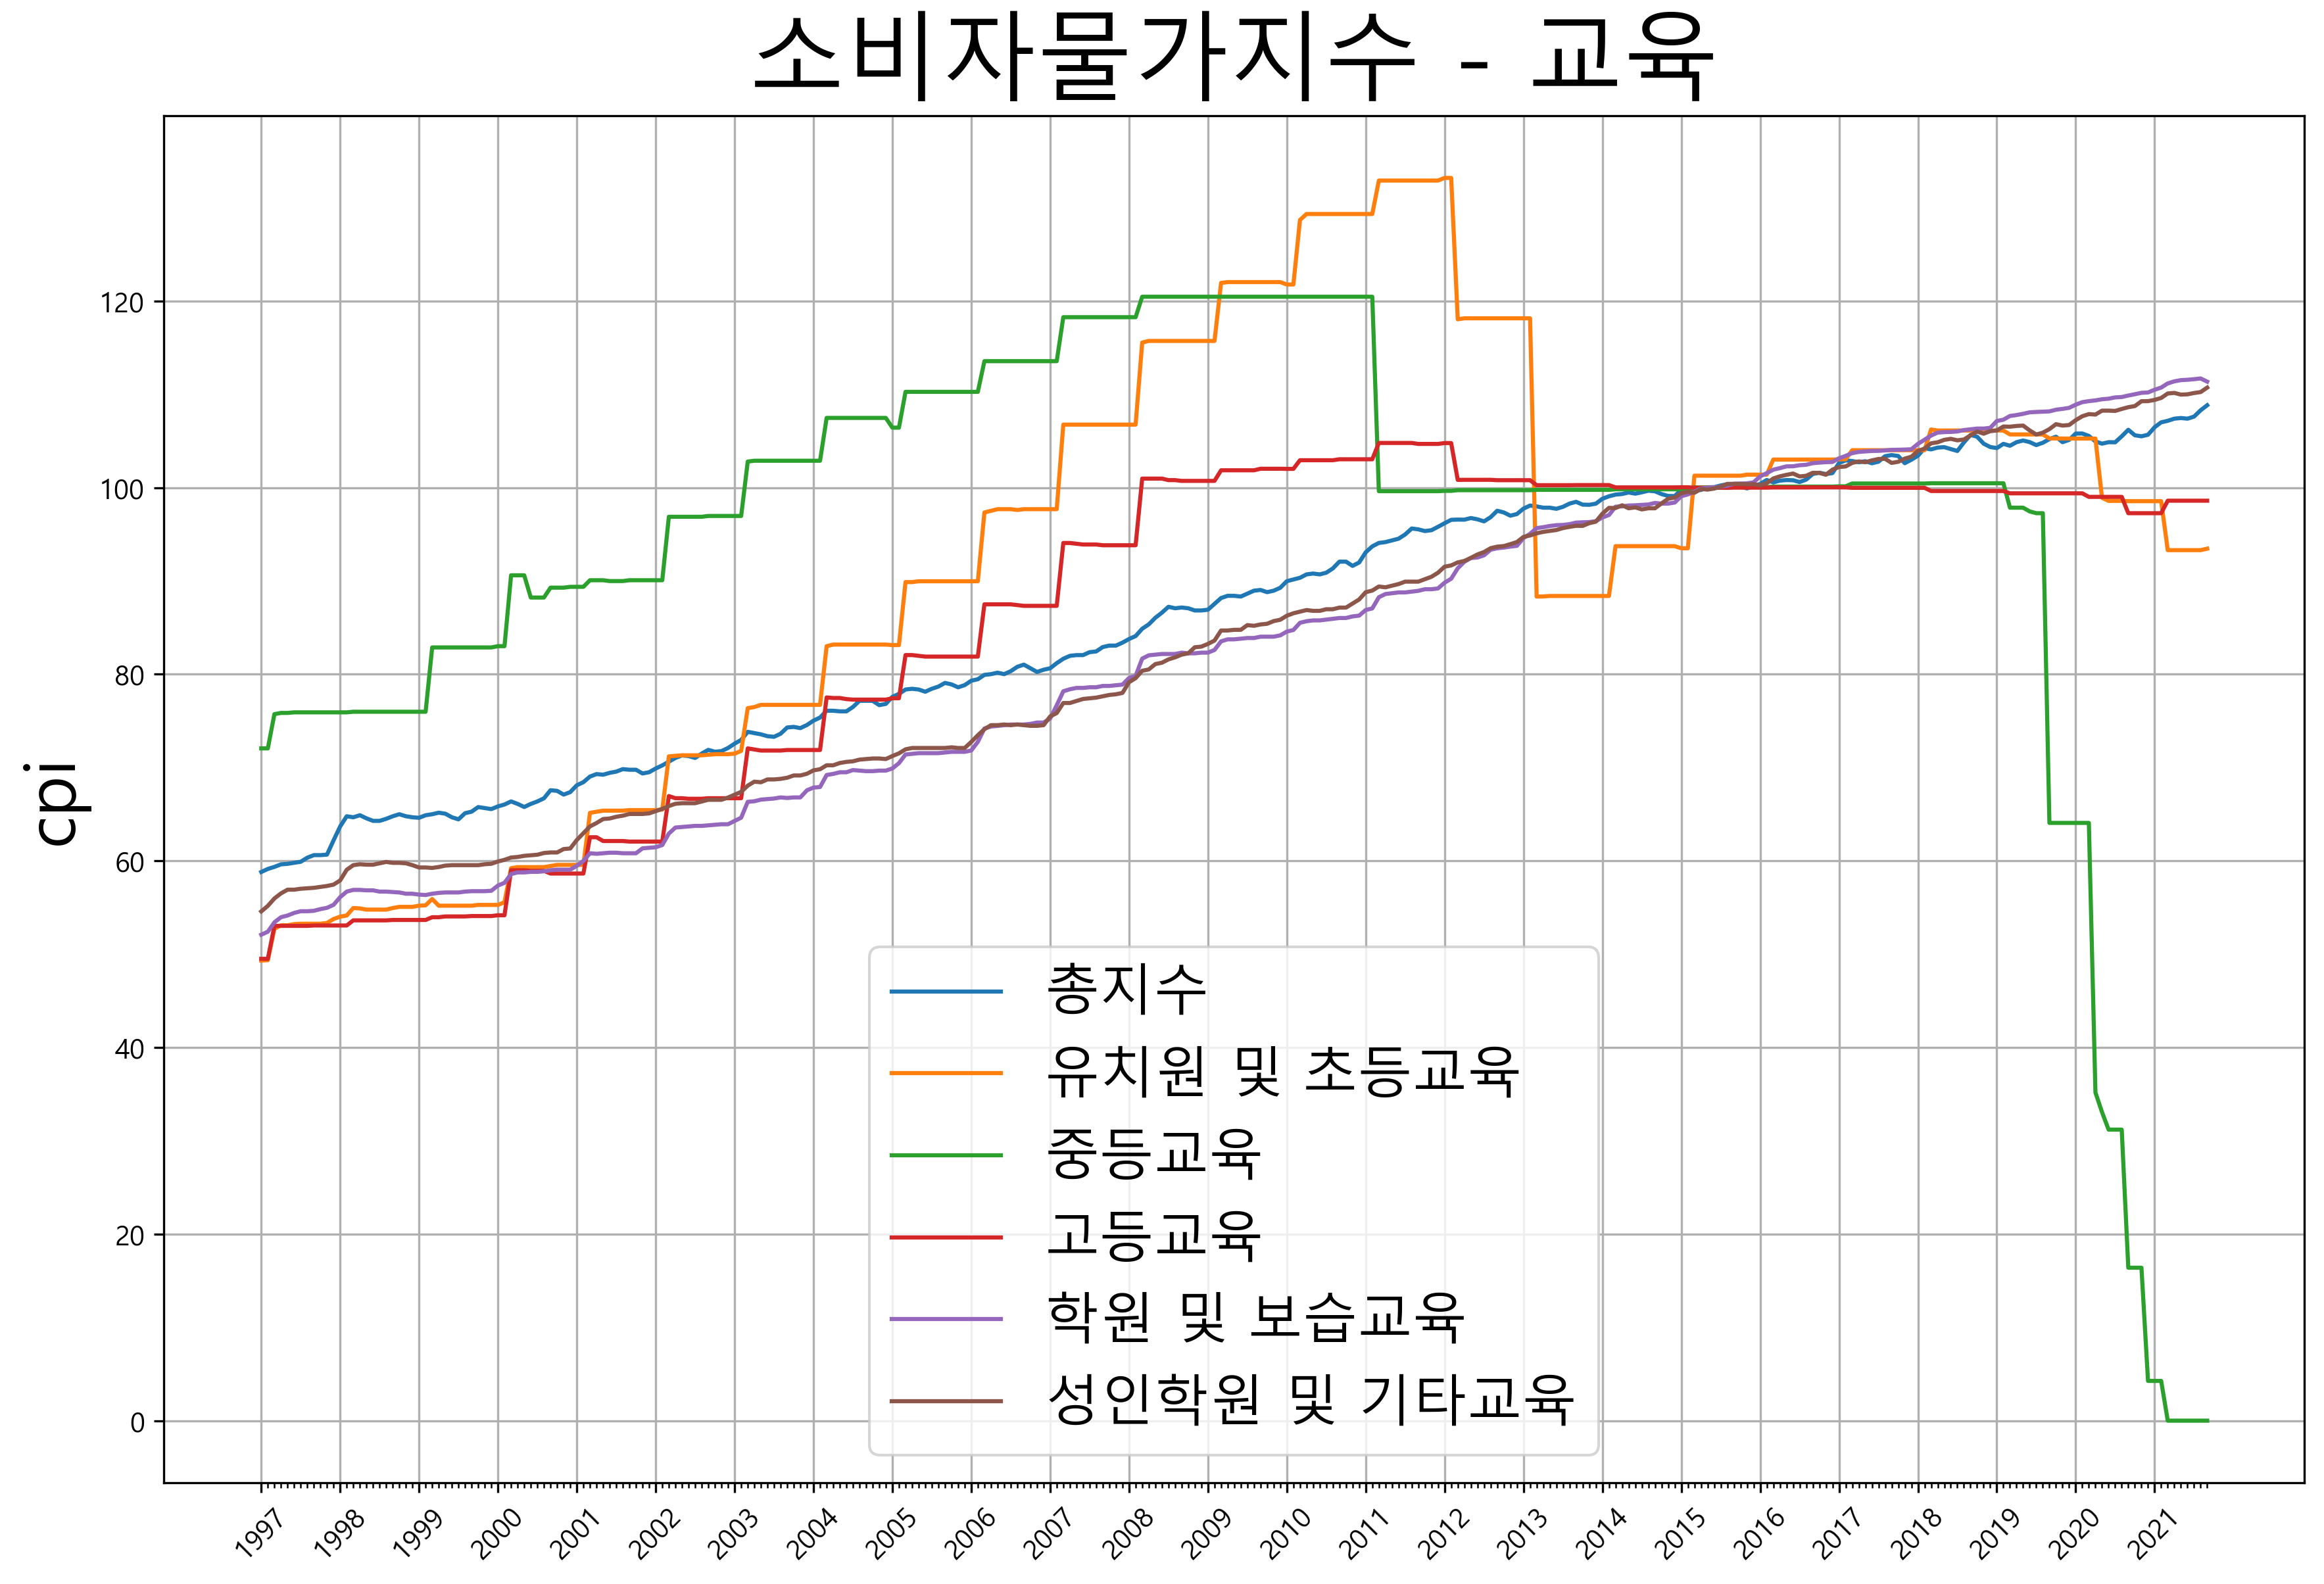

In [25]:

fig = plt.figure(dpi=300, figsize=(14,9))
plt.rc('font', family='Malgun Gothic')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
ax = fig.add_subplot(111)
parameters = {'axes.labelsize': 25,
          'axes.titlesize': 35}
plt.rcParams.update(parameters)
list = ['0 총지수','유치원 및 초등교육','중등교육','고등교육','학원 및 보습교육','성인학원 및 기타교육']
list2 = ['총지수','유치원 및 초등교육','중등교육','고등교육','학원 및 보습교육','성인학원 및 기타교육']
ax.plot(cpi_d.index, cpi_d[list], 
        label=list2)

ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks,
             minor=True)
plt.rc('legend', fontsize=20)
ax.legend()
ax.set_title("소비자물가지수 - 교육")
ax.set_ylabel("cpi")
major_xticks = cpi_d.index[::12]
major_xticks_int = [int(i[0:4]) for i in major_xticks]
plt.xticks(major_xticks, major_xticks_int)
plt.xticks(rotation=45)

plt.grid(True)
plt.savefig('./plot/소비자물가지수-교육', transparent = True)

plt.show()

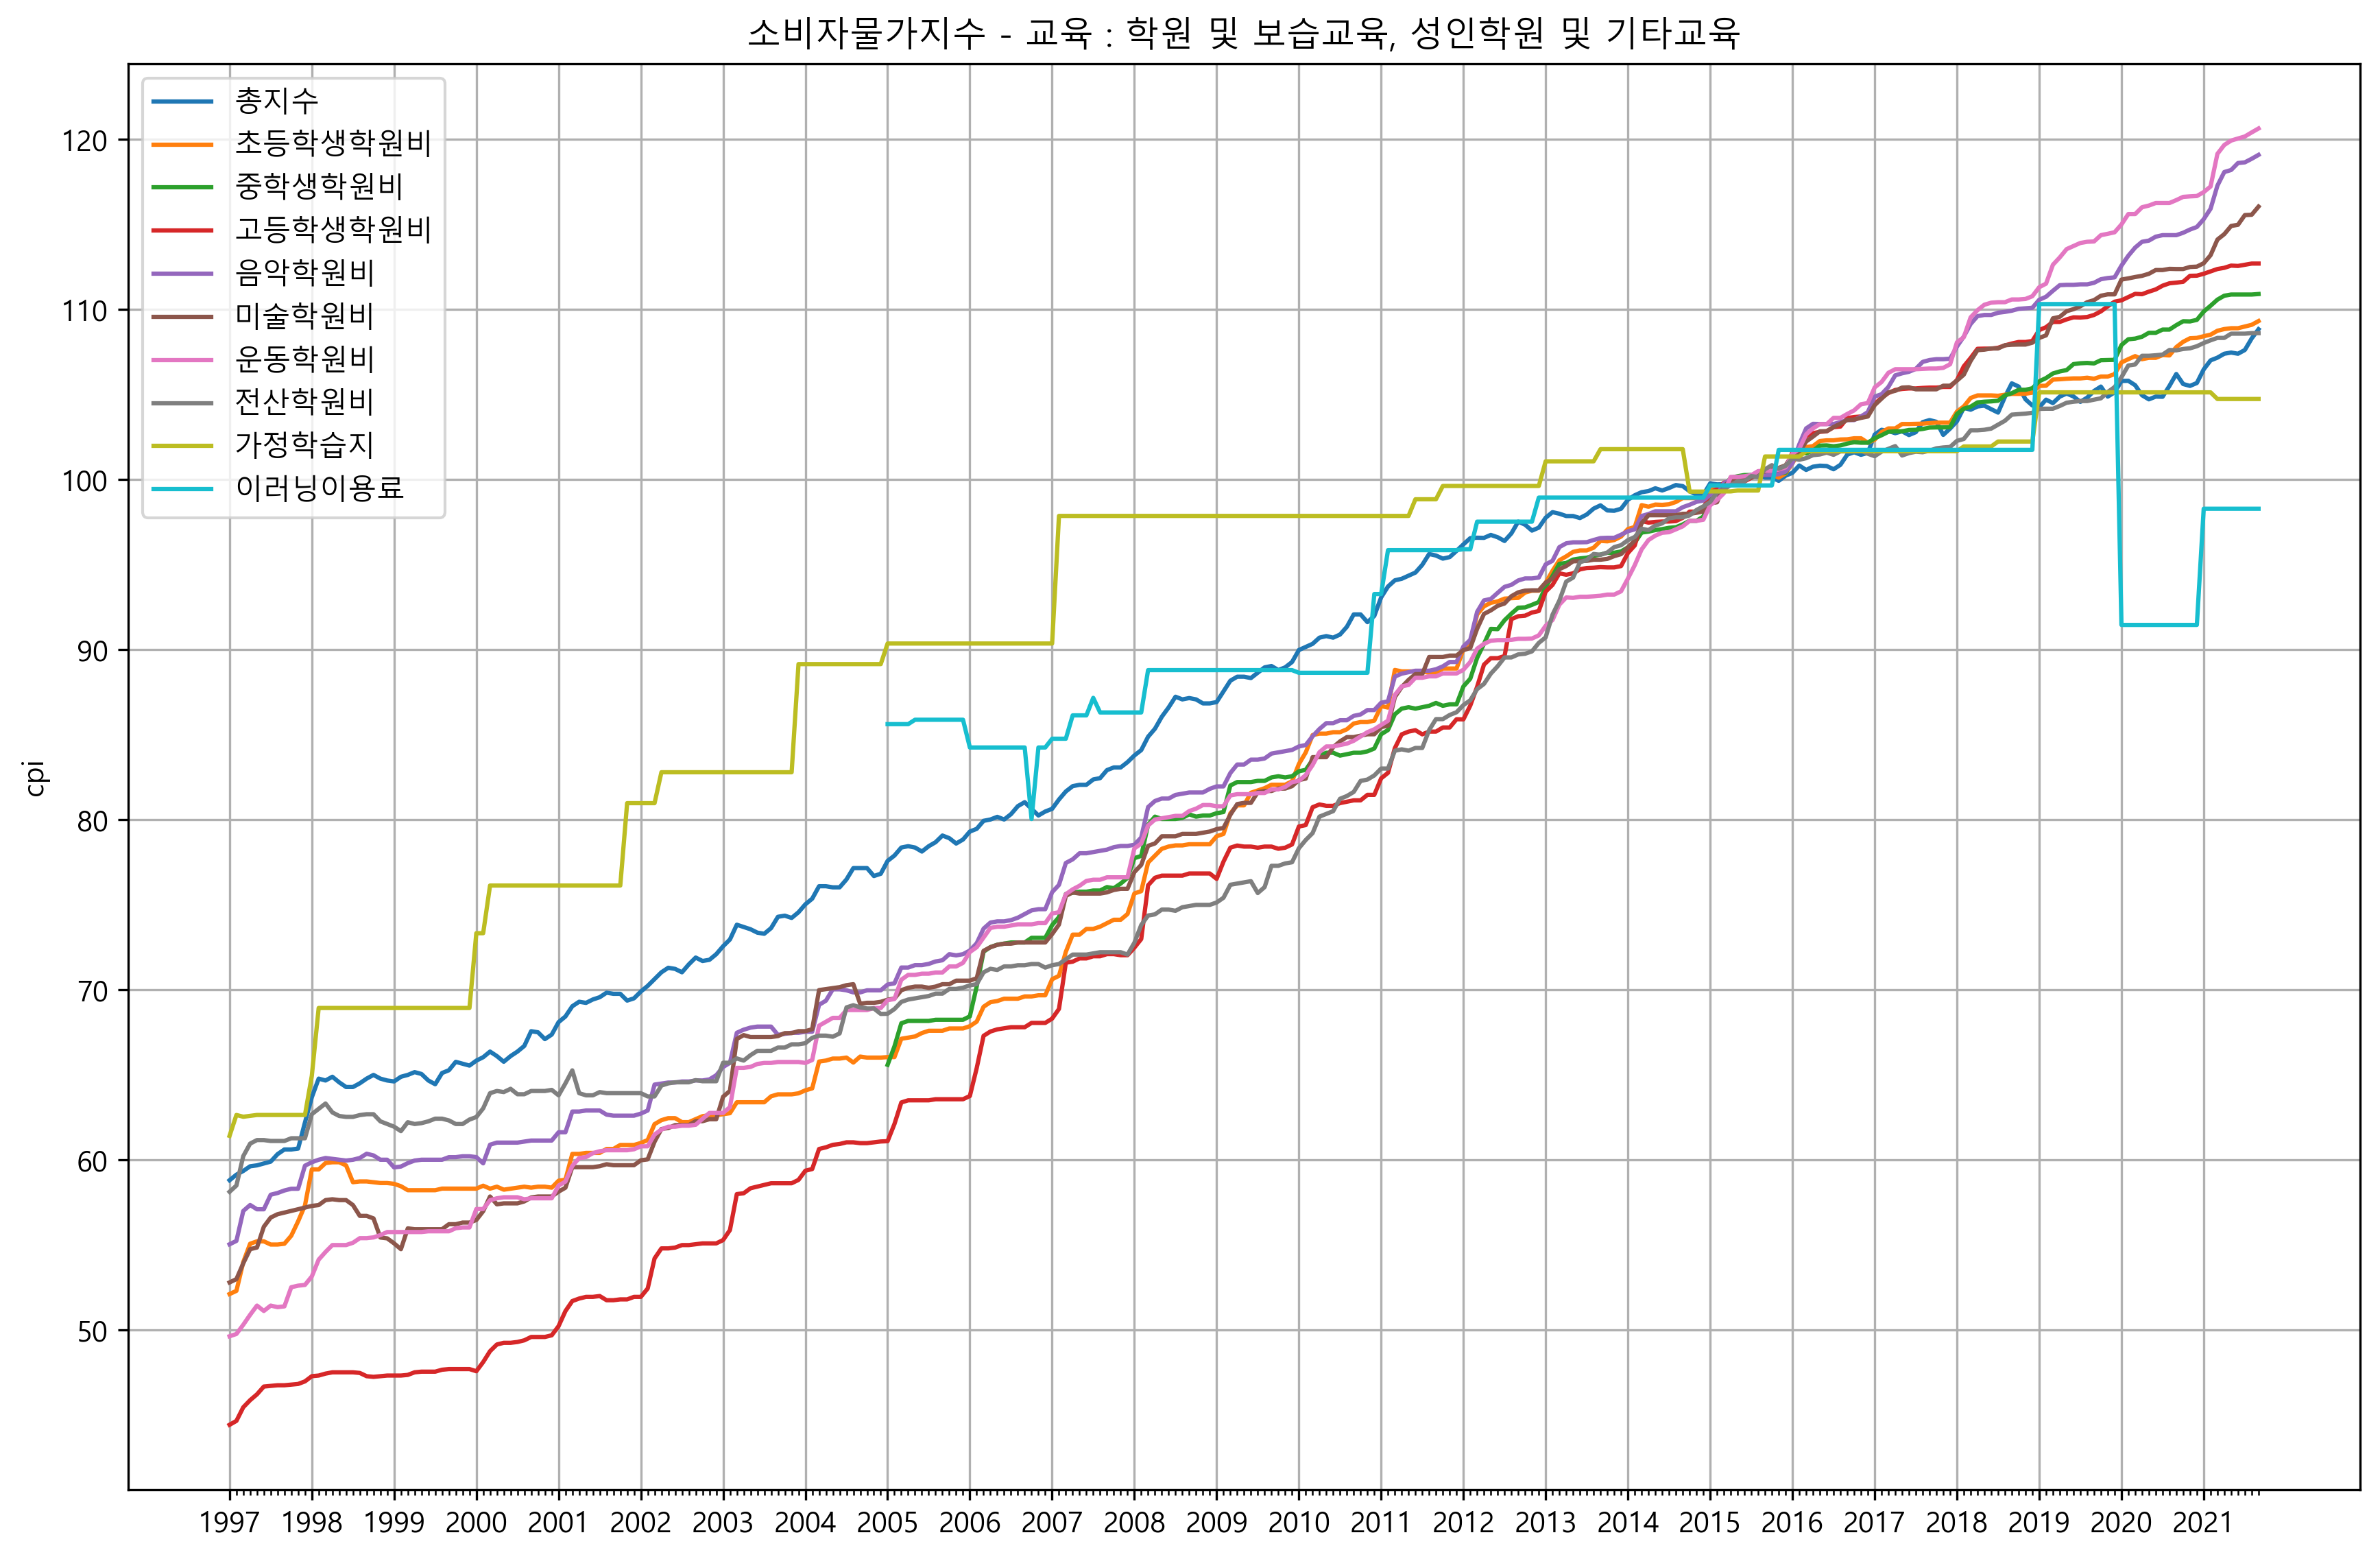

In [26]:
matplotlib.rc_file_defaults()
fig = plt.figure(dpi=300, figsize=(14,9))
plt.rc('font', family='Malgun Gothic')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
ax = fig.add_subplot(111)
list = ['0 총지수','초등학생학원비','중학생학원비','고등학생학원비','음악학원비','미술학원비',
        '운동학원비','전산학원비','가정학습지','이러닝이용료']
list2 = ['총지수','초등학생학원비','중학생학원비','고등학생학원비','음악학원비','미술학원비',
        '운동학원비','전산학원비','가정학습지','이러닝이용료']
ax.plot(cpi_d.index, cpi_d[list], 
        label=list2)
major_xticks = cpi_d.index[::12]
major_xticks_int = [int(i[0:4]) for i in major_xticks]
ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks,
             minor=True)
ax.legend()
ax.set_title("소비자물가지수 - 교육 : 학원 및 보습교육, 성인학원 및 기타교육")
ax.set_ylabel("cpi")
plt.xticks(major_xticks, major_xticks_int)
plt.grid(True)
plt.savefig('./plot/소비자물가지수 - 교육 세부항목', transparent = True)

plt.show()

## 사교육비-신생아수

In [27]:
f = open('./01-사교육비/학교급별__학생_1인당_월평균_사교육비_20211101012003.csv')
data = csv.reader(f)

one = pd.DataFrame(data)
one = one.rename(columns=one.iloc[0])
one = one.drop(one.index[0:2])
one = one.drop(['과목 및 유형'], axis=1)
one.set_axis(['사교육비'], axis=0, inplace=True)
one = one.astype(float)
one = one.T
one

,사교육비
2007,22.2
2008,23.3
2009,24.2
2010,24.0
2011,24.0
2012,23.6
2013,23.9
2014,24.2
2015,24.4
2016,25.6


In [28]:
f = open('./00-출산율/출생아수__합계출산율__자연증가_등_20211101012623.csv')
data = csv.reader(f)

by = pd.DataFrame(data)
by = by.rename(columns=by.iloc[0])
by = by.drop(by.index[0])
by = by.drop(['기본항목별'], axis=1)
by.set_axis(['신생아수'], axis=0, inplace=True)
by = by.astype(float)
by = by.T
by

,신생아수
2007,496822.0
2008,465892.0
2009,444849.0
2010,470171.0
2011,471265.0
2012,484550.0
2013,436455.0
2014,435435.0
2015,438420.0
2016,406243.0


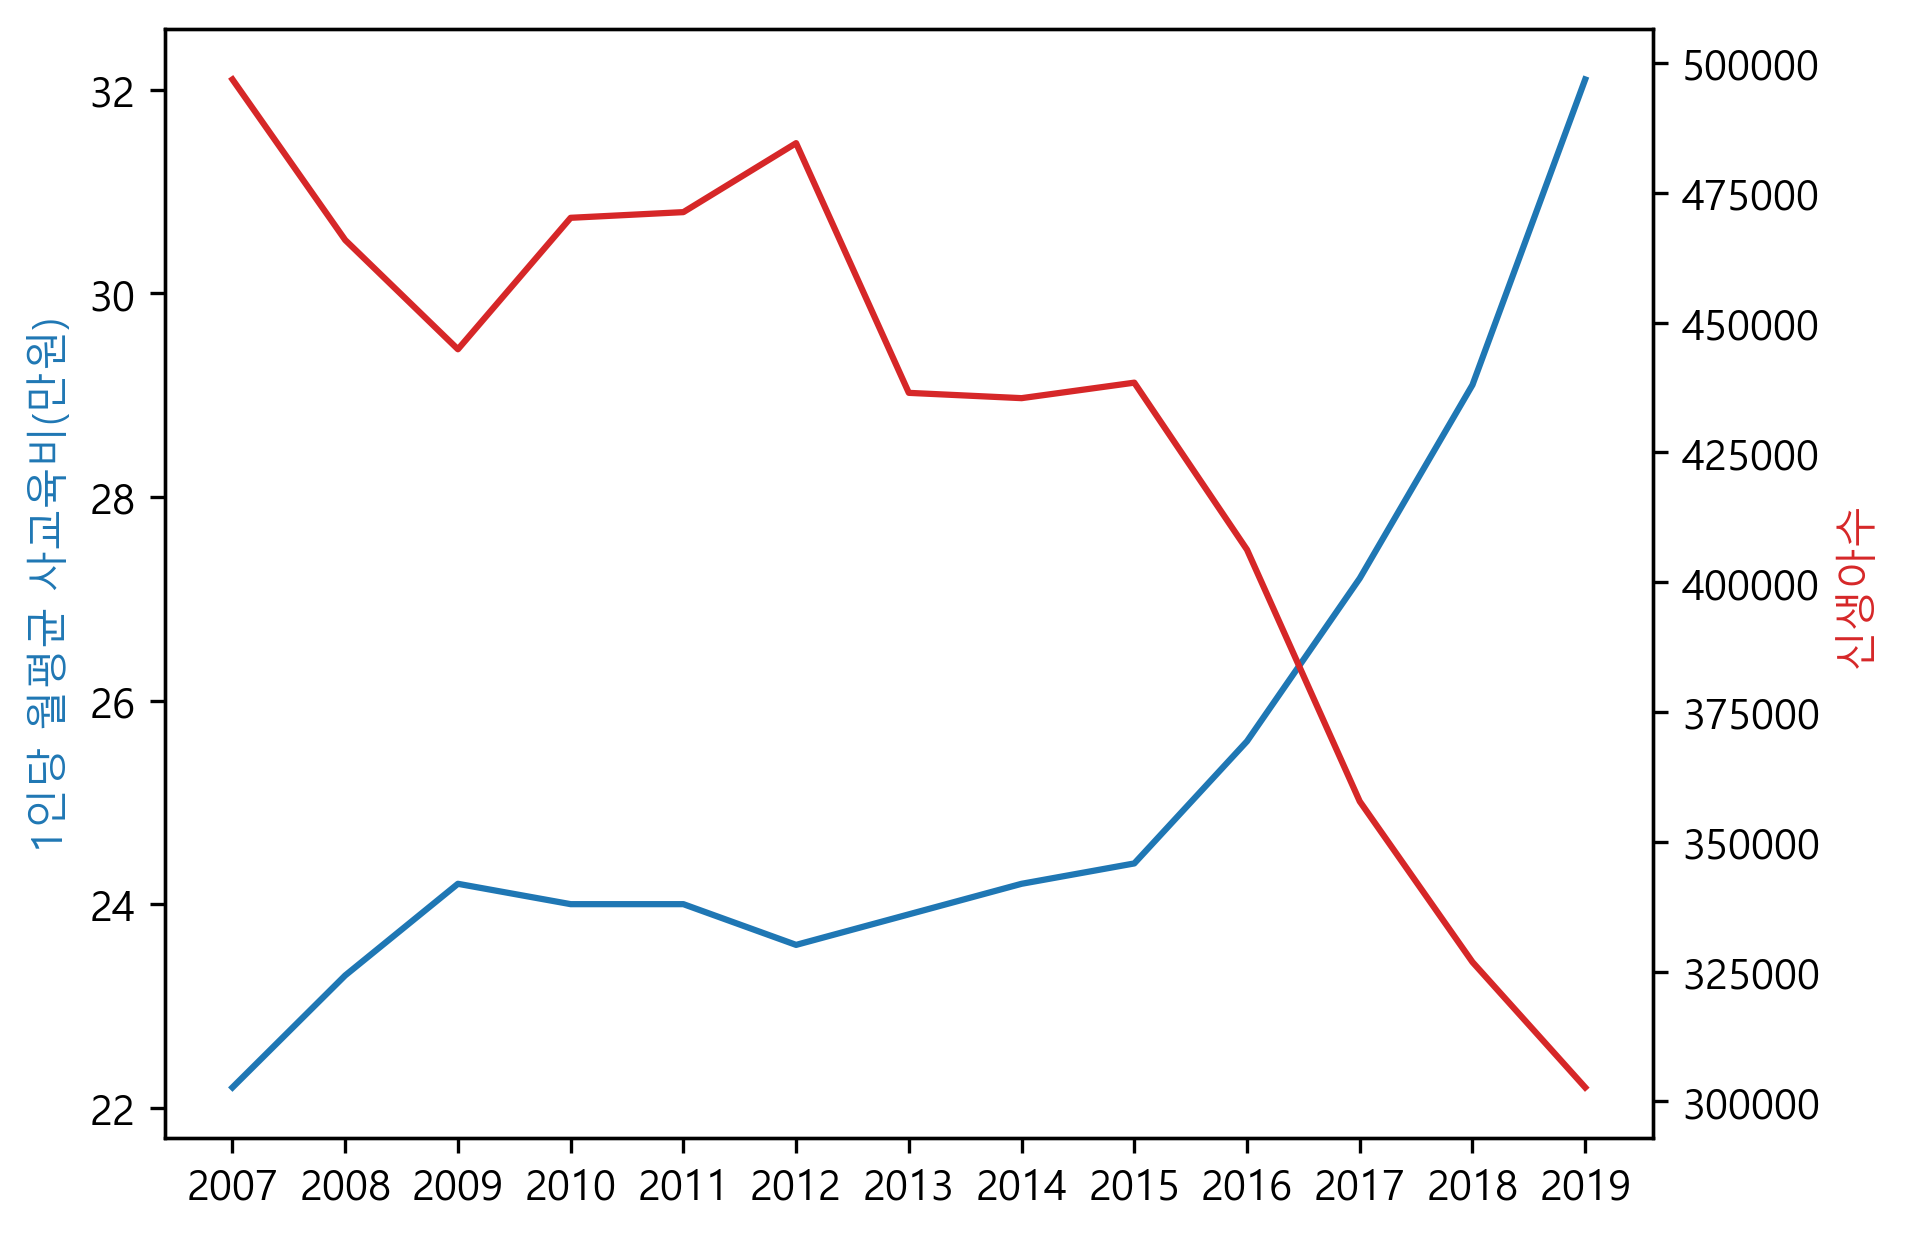

In [29]:

fig = plt.figure(dpi=300)
plt.rc('font', family='Malgun Gothic')
ax1 = fig.add_subplot(111)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax1.set_ylabel('1인당 월평균 사교육비(만원)',color='tab:blue')
ax2.set_ylabel('신생아수',color='tab:red')
ax1.plot(one, color='tab:blue')
ax2.plot(by, color='tab:red')

plt.show()

In [30]:
f = open('./00-출산율/시도_합계출산율__모의_연령별_출산율_20211102013016.csv')
data = csv.reader(f)

by2 = pd.DataFrame(data)
by2 = by2.rename(columns=by2.iloc[0])
by2 = by2.drop(by2.index[0])
by2 = by2.drop([1], axis=0)
by2 = by2.drop(['시도별'], axis=1)
by2.set_axis(['합계출산율'], axis=0, inplace=True)
by2 = by2.astype(float)
by2 = by2.T

by2

,합계출산율
2007,1.259
2008,1.192
2009,1.149
2010,1.226
2011,1.244
2012,1.297
2013,1.187
2014,1.205
2015,1.239
2016,1.172


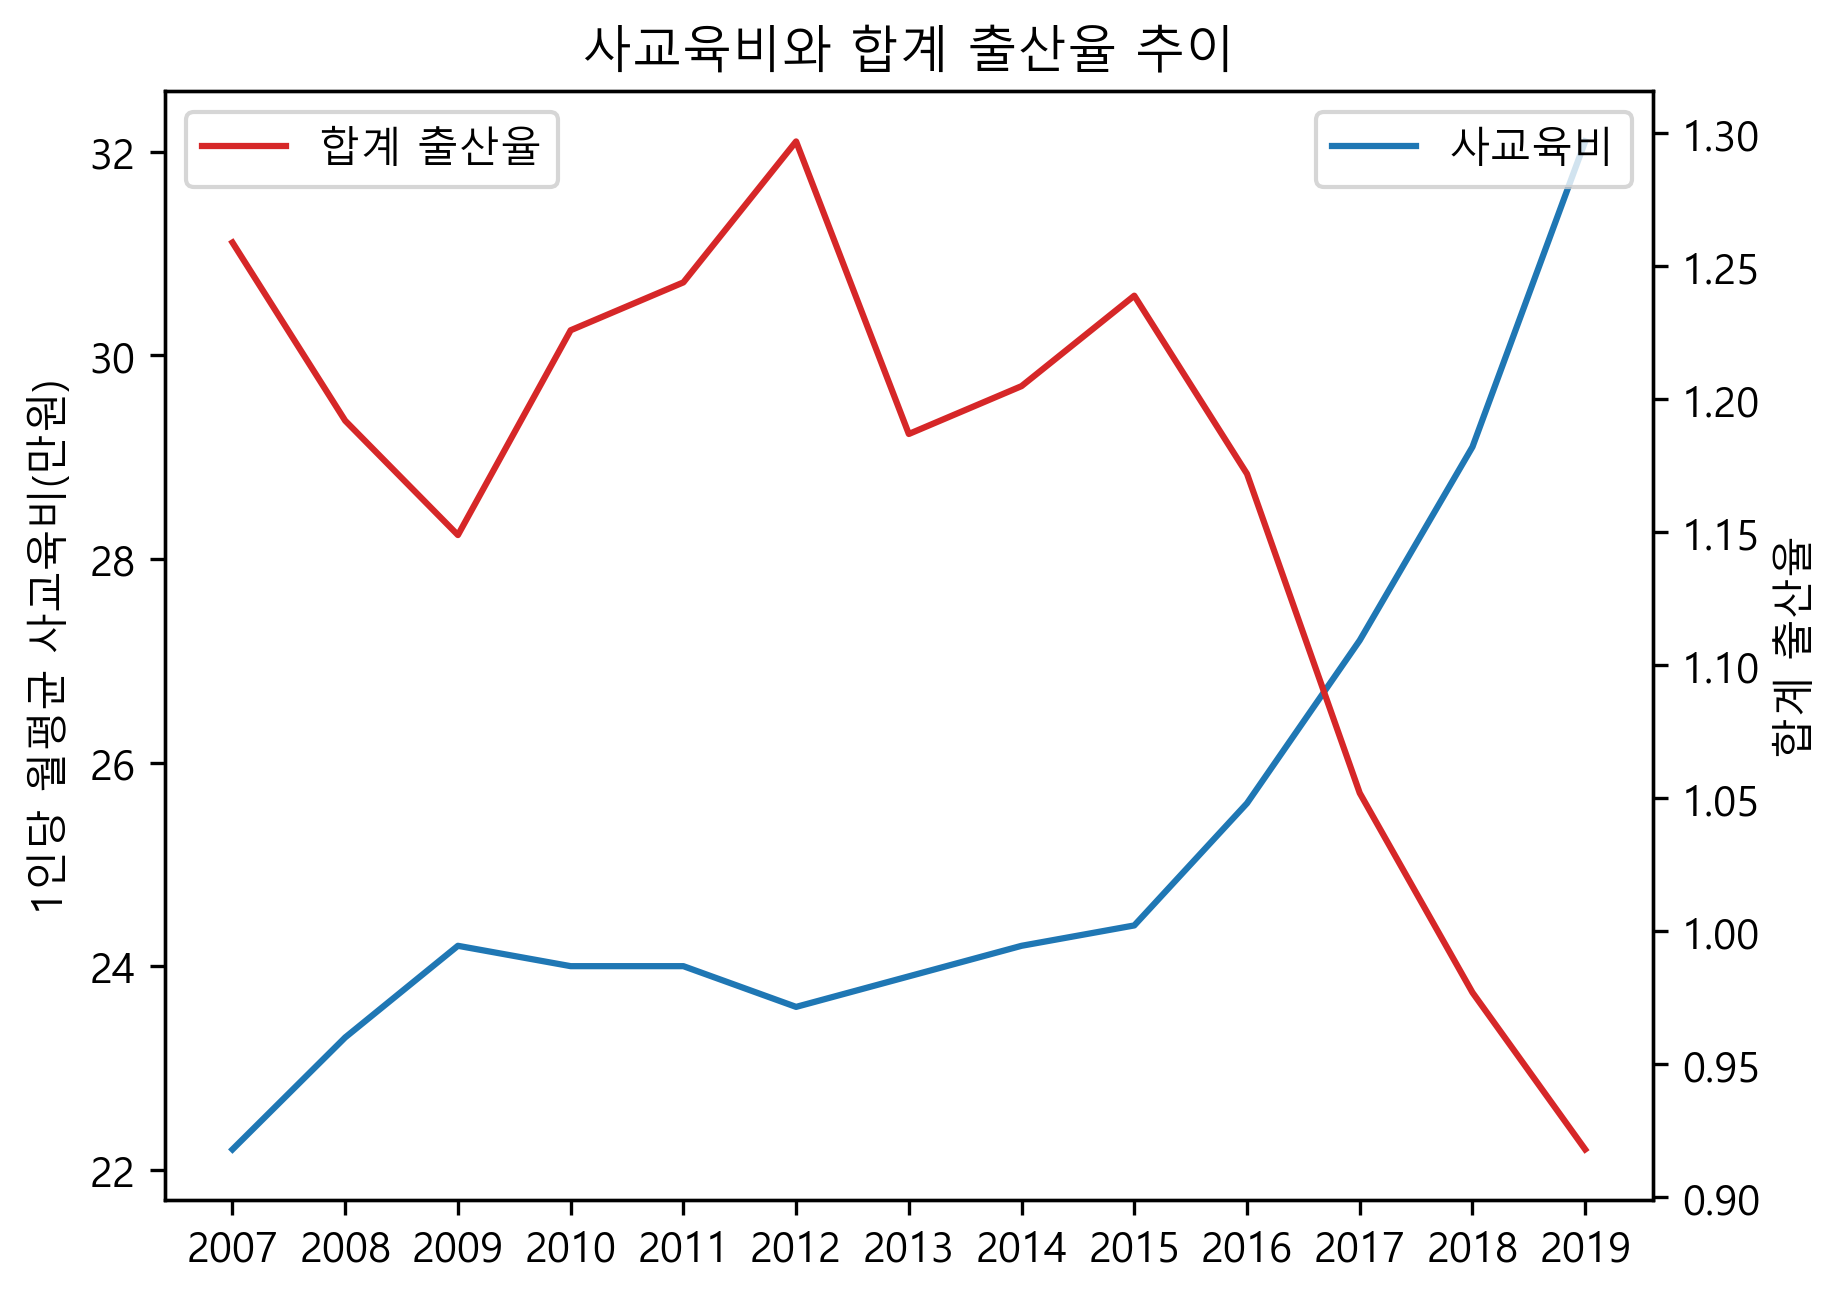

In [31]:

fig = plt.figure(dpi=300)
plt.rc('font', family='Malgun Gothic')
ax1 = fig.add_subplot(111)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax1.set_ylabel('1인당 월평균 사교육비(만원)')
ax2.set_ylabel('합계 출산율')

ax1.set_title("사교육비와 합계 출산율 추이")
ax1.plot(one, color='tab:blue', label='사교육비')
ax2.plot(by2[0:-1], color='tab:red', label='합계 출산율')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')

plt.savefig('./plot/사교육비와 합계 출산율 추이', transparent = True)
# plt.grid(True)
plt.show()

## 사교육 참여율

In [32]:
f = open('./06-사교육참여율/학교급_및_시도별_사교육_참여율_20211102025243.csv')
data = csv.reader(f)

ed = pd.DataFrame(data)
ed = ed.rename(columns=ed.iloc[0])
ed = ed.drop(ed.index[0])
ed = ed.drop([1], axis=0)
ed = ed.drop(['시도별'], axis=1)
ed.set_axis(['참여율'], axis=0, inplace=True)
ed = ed.astype(float)
ed = ed.T

ed

,참여율
2009,75.0
2010,73.6
2011,71.7
2012,69.4
2013,68.8
2014,68.6
2015,68.8
2016,67.8
2017,71.2
2018,72.8


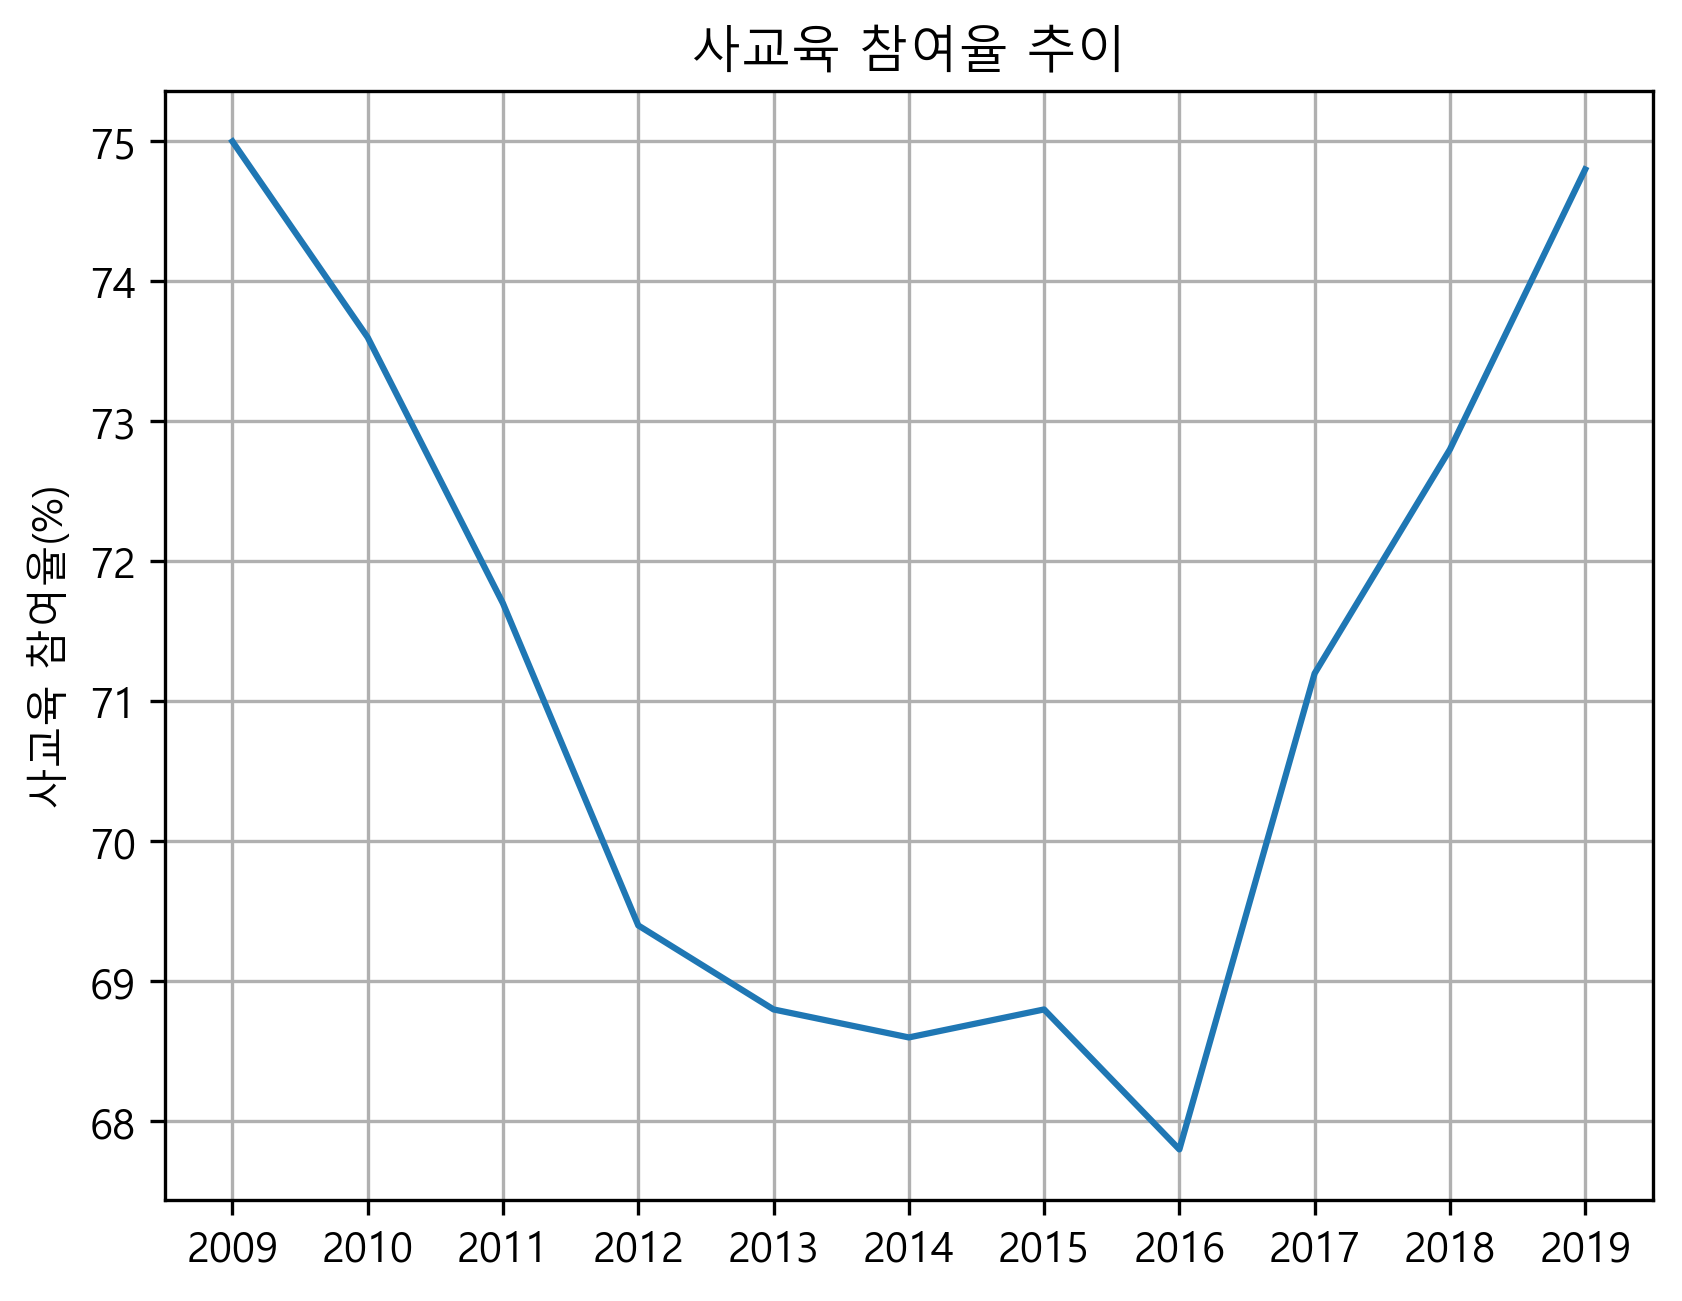

In [33]:

fig = plt.figure(dpi=300)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('font', family='Malgun Gothic')
ax = fig.add_subplot(111)
ax.plot(ed)
ax.set_ylabel('사교육 참여율(%)')
ax.set_title("사교육 참여율 추이")
plt.grid(True)
plt.savefig('./plot/사교육 참여율 추이', transparent = True)

plt.show()